# Instacart Basket Analysis

1. Used Data (Base Line):
    1. [https://github.com/KazukiOnodera/Instacart](https://github.com/KazukiOnodera/Instacart) 
    2. [https://www.kaggle.com/charalambos/xgb-of-instacart-ml-2-notebook](https://www.kaggle.com/charalambos/xgb-of-instacart-ml-2-notebook) → Baseline 모델로 이용
    3. [https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart/notebook](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart/notebook()) → Visaulization 및 EDA 참고
2. Problem : 
Predict which previously purchased products will be in a user’s next order.<br>
    1. 특정 고객이 가진 주문정보 만으로는 그 수가 적어 제대로 된 예측을 할 수 없다. ( 약 15개의 주문정보 뿐) 전체 고객의 확률분포를 가지고 특정 고객의 확률분포를 이용하는 것은 문제가 많아(고객의 특성을 반영하지 못함). 이를 해결하고자, 표본집단이 얼마나 모집단을 잘 대표하는지 대표성을 구하고자 하였습니다. 따라서, 어떤 고객의 특성을 잘 대변하는 집단으로 묶어서 그 집단의 확률을 구한다면 좀 더 잘 대표하지 않을까 생각하였습니다.
    2. 결국 특정 손님이 이 물건을 미래 구매 여부를 예측하는 문제다. 이를 추론하기 위해선 이 손님이 정보를 알고 있는 손님과 얼마나 유사하게 제품을 구매 하는 지를 이용하여 → 특정 집단에 속하는 고객이라면 다음 물품은 어떤 것을 구매할 확률이 높다고 가설을 세웠습니다.
    
3. Feature selection : 
| 0                                                                                                 | category       | variable                              | Formula&Feature                                                                                                                                                                                                                                                                                                                                                                                                                 |
|---------------------------------------------------------------------------------------------------|----------------|---------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 1                                                                                                 | user           | Times_Bought_N                        | dataset.groupby(['user_id', 'product_id'])[['order_id']].count()<br/>유저가 산 특정 상품의 총 주문 횟수                                                                                                                                                                                                                                                                                                                                       |
| 2                                                                                                 | user           | total_orders                          | dataset.groupby('user_id')['order_number'].max()<br/>유저별 총 주문 횟수                                                                                                                                                                                                                                                                                                                                                                |
| 3                                                                                                 | user x product | uxp_reorder_ratio                     | dataset.Times_Bought_N / dataset.total_orders-dataset.first_order_number+1<br/>유저가 첫주문 이후 특정 상품을 재주문 할 확률                                                                                                                                                                                                                                                                                                                       |
| 4                                                                                                 | user           | u_reordered                           | dataset.groupby(['user_id'])['reordered'].aggregate('mean')<br/>유저가 재주문할 확률                                                                                                                                                                                                                                                                                                                                                     |
| 5                                                                                                 | product        | product_total_purchases               | dataset.groupby('product_id')['order_id'].count()<br/>상품이 총 팔린 횟수                                                                                                                                                                                                                                                                                                                                                               |
| 6                                                                                                 | product        | p_reorder_ratio                       | dataset.groupby('product_id')['reordered'].mean()<br/>상품별 재주문될 평균 확률                                                                                                                                                                                                                                                                                                                                                            |
| 7                                                                                                 | -              | eval_set                              | 평가 set                                                                                                                                                                                                                                                                                                                                                                                                                          |
| 8                                                                                                 | -              | order_id                              | 주문 id                                                                                                                                                                                                                                                                                                                                                                                                                           |
| 9                                                                                                 | time           | order_hour_of_day                     | 상품 구매한 시각                                                                                                                                                                                                                                                                                                                                                                                                                       |
| 10                                                                                                | time           | order_dow                             | 상품을 주문한 요일 (기본 데이터셋)                                                                                                                                                                                                                                                                                                                                                                                                            |
| 11                                                                                                | product        | aisle_id                              | aisle id                                                                                                                                                                                                                                                                                                                                                                                                                        |
| 12                                                                                                | product        | department_id                         | department_id                                                                                                                                                                                                                                                                                                                                                                                                                   |
| 13                                                                                                | product        | mean_position                         | dataset.groupby('product_id')['add_to_cart_order'].mean().reset_index(name = 'mean_position')<br/>상품이 카트에 추가 되는 순서 평균                                                                                                                                                                                                                                                                                                           |
| 14                                                                                                | product        | dept_rodrder_rate                     | dataset.groupby('department')['reordered'].mean()<br/>품목별 재주문 확률                                                                                                                                                                                                                                                                                                                                                                |
| 15                                                                                                | product        | aisle_reorder_reate                   | dataset.groupby('aisle')['reordered'].mean() <br/>aisle재주문 확률                                                                                                                                                                                                                                                                                                                                                                   |
| 16                                                                                                | product        | dow_reordered                         | dataset.groupby('order_dow')['reordered'].mean() <br/>요일 별 재주문 확률                                                                                                                                                                                                                                                                                                                                                               |
| 17                                                                                                | product        | dow_aisle_reordered                   | dataset.groupby(['order_dow', 'aisle_id'])['reordered'].mean()<br/>요일에 따른 ailsle 재주문 확률                                                                                                                                                                                                                                                                                                                                         |
| 18                                                                                                | product        | dow_dept_reordered                    | dataset.groupby(['departmet_id', 'aisle_id'])['reordered'].mean() <br/>요일에 따른 품목 재주문 확률                                                                                                                                                                                                                                                                                                                                         |
| 19                                                                                                | product        | dept_percentage                       | dataset['department_id'].value_counts().to_frame('dept_percentage').reset_index()<br/>dept_percentage['dept_percentage']/sum(dept_percentage['dept_percentage'])<br/>품목별 주문확률                                                                                                                                                                                                                                                   |
| 20                                                                                                | time           | dow_hour_rorder                       | dataset.groupby(['order_dow', 'order_hour_of_day'])['reordered'].mean()<br/>요일과 시간에 따른 재주문 확률                                                                                                                                                                                                                                                                                                                                   |
| 21                                                                                                | prodct         | product_roredered_dow                 | dataset.groupby(['product_id','order_dow'])["reordered"].mean()<br/>요일별 특정 상품의 재주문 확률                                                                                                                                                                                                                                                                                                                                           |
| 22                                                                                                | product        | prod_rordered_hod                     | dataset.groupby(['product_id','order_hour_of_day'])["reordered"].mean()<br/> 시간별 특정 상품의 재주문 확률                                                                                                                                                                                                                                                                                                                                  |
| 23                                                                                                | time           | day_reorder_rate                      | df = prior_data.groupby(['product_id','order_dow'])["product_id"].size()<br/>df = df/prior_data.groupby(["product_id"]).size() #특정 상품의 총 주문량<br/>요일별 특정 상품 주문량/ 특정 상품 총 주문량                                                                                                                                                                                                                                                     |
| 24                                                                                                | time x product | hour_reorder_rate                     |  df = prior_data.groupby(['product_id','order_hour_of_day'])["reordered"].size()<br/> df = df/prior_data.groupby(["product_id"]).size()<br/>시간별 특정 상품 주문량/특정 상품 총 주문량                                                                                                                                                                                                                                                           |
| 
| 26                                                                                                | time           | days_since_prior_order                | 주문 이후 재주문 하는 일수                                                                                                                                                                                                                                                                                                                                                                                                                 |
|
| 28                                                                                                | product        | uxp_mean_position                     | dataset.groupby(["user_id","product_id"])['add_to_cart_order'].mean()<br/>고객이 카트에 추가하는 상품의 평균 순서                                                                                                                                                                                                                                                                                                                                |
| 29~31                                                                                             | product        | p_reduced_feat_1~3                    | product_name 에서 높은 빈도를 나타낸 단어로 8개의 그룹을 만든후 NMF로 차원 축소를 하여 변수 3개 생성<br/>많은 구매를한 상품군                                                                                                                                                                                                                                                                                                                                              |
| 32                                                                                                | time x user    | hod_user_reorder                      | "hod_user_reorder = all_join.groupby(['order_hour_of_day','user_id'])['reordered'].agg('sum').reset_index() <br>temp1= all_join.groupby('user_id').agg({'reordered':'sum'}).reset_index()<br>temp1.columns=['user_id','total'] <br> hod_user_reorder = hod_user_reorder.merge(temp1,on='user_id') <br>hod_user_reorder['user_hour_ratio'] = hod_user_reorder.reordered/hod_user_reorder.total"                                                                                                                                                                                                                                                                                                                    |
| 33                                                                                                | time x user    | hod_product_reorder                   | "hod_product_reorder = all_join.groupby(['order_hour_of_day','product_id'])['reordered'].agg('sum').reset_index() <br> temp1= all_join.groupby('product_id').agg({'reordered':'sum'}).reset_index() <br> temp1.columns=['product_id','total']  <br> hod_product_reorder = hod_product_reorder.merge(temp1,on='product_id') <br> hod_product_reorder['user_hour_ratio'] = hod_product_reorder.reordered/hod_product_reorder.total"                                                                                                                                                                                                                                                                                                             |
| 34                                                                                                | time x user    | product_dow_reorder                   | product_dow_reorder = all_join.groupby(['order_dow','product_id'])['reordered'].agg('sum').reset_index()<br/>temp1= all_join.groupby('product_id').agg({'reordered':'sum'}).reset_index() # reorder만<br/>temp1.columns=['product_id','total']<br/>product_dow_reorder = product_dow_reorder.merge(temp1,on='product_id')<br/>product_dow_reorder['product_day_ratio'] = product_dow_reorder.reordered/product_dow_reorder.total |
| 35                                                                                                | time x user    | user_dow_reordered                    | user_dow_reordered = all_join.groupby(['order_dow','user_id'])['reordered'].agg('sum').reset_index()<br/>temp1= all_join.groupby('user_id').agg({'reordered':'sum'}).reset_index()<br/>temp1.columns=['user_id','total']<br/>user_dow_reordered = user_dow_reordered.merge(temp1,on='user_id')<br/>user_dow_reordered['user_day_ratio'] = user_dow_reordered.reordered/user_dow_reordered.total                                 |
| 36                                                                                                | user x product | product_avg_peruser                   | all_join.groupby(['user_id','product_id'])['add_to_cart_order'].mean().to_frame('avg_add_to_cart_pos')<br/># 유저가 구매한 상품을 카트에 추가하는 평균순서<br/>                                                                                                                                                                                                                                                                                     |
| 37                                                                                                | product        | order_size_avg                        | order_size = all_join.groupby(['user_id', 'order_id'])[['product_id']].count()<br/>order_size.columns = ['size'] <br/>order_size_avg = order_size.groupby('user_id')['size'].mean().to_frame('order_size_avg').reset_index()                                                                                                                                                                                                  
| 38                                                                                                | y              | reordered                             | 재구매                                                                                                                                                                                                                                                                                                                                                                                                                             |
    
4. Model : XGBoost, Catboost, Logistic Regression, Random Forest
5. Score  <br>
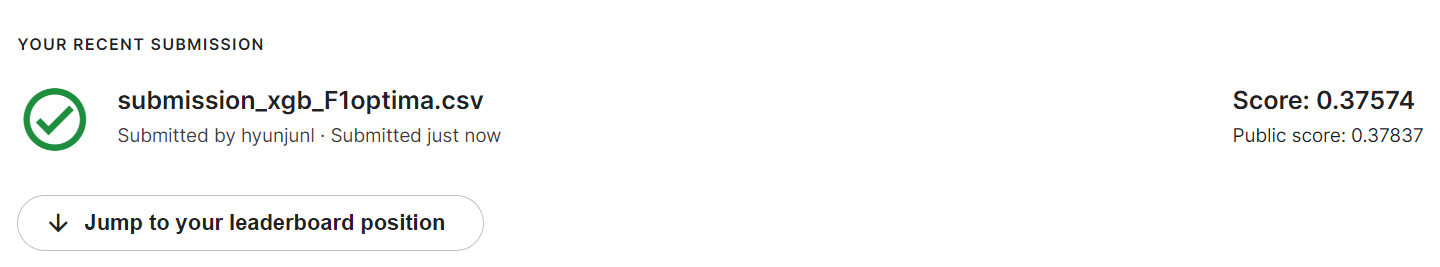

In [57]:
#Importing useful libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import sys
import os
color = sns.color_palette()
%matplotlib inline
# Garbage Collector to free up memory
import gc                         
gc.enable()

## Insta Cart Toy Project
- EDA
- Visulaization
- Analysis
- Train & Vailate
- Result

In [2]:
# Data load prior data
aisles = pd.read_csv('/home/jovyan/nas/1_user/hjlee@agilesoda.ai/Instacart/data_set/aisles.csv')
departments = pd.read_csv('/home/jovyan/nas/1_user/hjlee@agilesoda.ai/Instacart/data_set/departments.csv')
order_prod_prior = pd.read_csv('/home/jovyan/nas/1_user/hjlee@agilesoda.ai/Instacart/data_set/order_products__prior.csv')

order_prod_train = pd.read_csv('/home/jovyan/nas/1_user/hjlee@agilesoda.ai/Instacart/data_set/order_products__train.csv')
orders = pd.read_csv('/home/jovyan/nas/1_user/hjlee@agilesoda.ai/Instacart/data_set/orders.csv')
products = pd.read_csv('/home/jovyan/nas/1_user/hjlee@agilesoda.ai/Instacart/data_set/products.csv')

## 1. EDA

In [3]:
# aisles.describe()
# order_prod_prior.describe()
orders.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.214874e+06
mean,1.710542e+06,1.029782e+05,1.715486e+01,2.776219e+00,1.345202e+01,1.111484e+01
std,9.875817e+05,5.953372e+04,1.773316e+01,2.046829e+00,4.226088e+00,9.206737e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.552715e+05,5.139400e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.710542e+06,1.026890e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,2.565812e+06,1.543850e+05,2.300000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,3.421083e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


In [4]:
# To create features buid 'all_join' as prior dataset
all_join = orders.merge(order_prod_prior, how = 'right', on ='order_id')
all_join = pd.merge(left = all_join, right = products , how = 'left', on ='product_id')
all_join = pd.merge(left = all_join, right = aisles , how = 'left', on ='aisle_id')
all_join = pd.merge(left = all_join, right = departments , how = 'left', on ='department_id')

In [5]:
all_join.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,202279,prior,3,5,9,8.0,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,202279,prior,3,5,9,8.0,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,202279,prior,3,5,9,8.0,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,202279,prior,3,5,9,8.0,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,202279,prior,3,5,9,8.0,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [6]:
# all_join의 데이터 예시
check1 = all_join[['user_id', 'product_id', 'add_to_cart_order', 'order_hour_of_day', 'reordered']].set_index('user_id').sort_index(ascending = True).reset_index()
check2 = check1.sort_values(by=[check1.columns[0], check1.columns[1]] ,ascending=True)
check2

,user_id,product_id,add_to_cart_order,order_hour_of_day,reordered
3,1,196,1,15,1
8,1,196,1,7,1
12,1,196,1,7,1
14,1,196,1,8,1
27,1,196,4,16,1
...,...,...,...,...,...
32434393,206209,44325,8,13,0
32434398,206209,48370,8,10,0
32434395,206209,48697,6,13,0
32434396,206209,48742,5,13,0


In [7]:
# check if prior data has all the users 206209

len(all_join['user_id'].unique())

# We have to make root data set using prior dataset

206209

### Way to make Train and Test data
- In 'orders' there are Train, Test, and Prior data.
- We use Prior data to make extra features for prediction.
- We need user per product but without duplication

### 날짜 데이터를 사용하기 위한 작업 (prior에서 만든 시간 변수들을 사용가능 하게 만듬)

In [8]:
# orders의 train과 test 만 추출 (prior 데이터 셋에서는 파생 변수 생성을 위해 사용)
# user_id 모두 가지고있다.
orders_future = orders[((orders.eval_set=='train') | (orders.eval_set=='test'))]
display(orders_future)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
10,1187899,1,train,11,4,8,14.0
25,1492625,2,train,15,1,11,30.0
38,2774568,3,test,13,5,15,11.0
44,329954,4,test,6,3,12,30.0
49,2196797,5,train,5,0,11,6.0
...,...,...,...,...,...,...,...
3420933,1716008,206205,train,4,1,16,10.0
3421001,1043943,206206,test,68,0,20,0.0
3421018,2821651,206207,test,17,2,13,14.0
3421068,803273,206208,test,50,5,11,4.0


In [9]:
# user reorder rate
user = all_join.groupby(['user_id'])['reordered'].mean().to_frame('u_reordered')

In [10]:
# Most purchased products
products_purchased = all_join.groupby('product_id')['order_id'].count().to_frame('product_total_purchases')

# For individual marketing which product did user buy
times = all_join.groupby(['user_id', 'product_id'])[['order_id']].count()
times.columns = ['Times_Bought_N']
times.head()

Times_Bought_N
user_id product_id                
1       196                     10
        10258                    9
        10326                    1
        12427                   10
        13032                    3

In [11]:
# user's total orders: order_number's max
total_orders = all_join.groupby('user_id')['order_number'].max().to_frame('total_orders')
total_orders

,total_orders
user_id,
1,10
2,14
3,12
4,5
5,4
...,...
206205,3
206206,67
206207,16


In [12]:
# To find when users ordered their products at the first time 
# (at this point because of goupby func row 30million ->13million)
first_order_no = all_join.groupby(['user_id', 'product_id'])['order_number'].min().to_frame('first_order_number').reset_index()
first_order_no

,user_id,product_id,first_order_number
0,1,196,1
1,1,10258,2
2,1,10326,5
3,1,12427,1
4,1,13032,2
...,...,...,...
13307948,206209,43961,4
13307949,206209,44325,7
13307950,206209,48370,11
13307951,206209,48697,7


In [13]:
# mean ratio of the _total
p_reorder = all_join.groupby('product_id')['reordered'].mean().to_frame('p_reorder_ratio')
p_reorder

,p_reorder_ratio
product_id,
1,0.613391
2,0.133333
3,0.732852
4,0.446809
5,0.600000
...,...
49684,0.111111
49685,0.122449
49686,0.700000


In [14]:
span = pd.merge(total_orders, first_order_no, on='user_id', how='right')
span['Order_Range_D'] = span.total_orders - span.first_order_number + 1
span

,user_id,total_orders,product_id,first_order_number,Order_Range_D
0,1,10,196,1,10
1,1,10,10258,2,9
2,1,10,10326,5,6
3,1,10,12427,1,10
4,1,10,13032,2,9
...,...,...,...,...,...
13307948,206209,13,43961,4,10
13307949,206209,13,44325,7,7
13307950,206209,13,48370,11,3
13307951,206209,13,48697,7,7


In [15]:
# user_id, product_id로 groupby한 times가 기초
uxp_ratio = pd.merge(times, span, on = ['user_id', 'product_id'], how='left')
uxp_ratio['uxp_reorder_ratio'] = uxp_ratio.Times_Bought_N / uxp_ratio.Order_Range_D
uxp_ratio = uxp_ratio.drop(['first_order_number', 'Order_Range_D'], axis = 1)
uxp_ratio

,user_id,product_id,Times_Bought_N,total_orders,uxp_reorder_ratio
0,1,196,10,10,1.000000
1,1,10258,9,10,1.000000
2,1,10326,1,10,0.166667
3,1,12427,10,10,1.000000
4,1,13032,3,10,0.333333
...,...,...,...,...,...
13307948,206209,43961,3,13,0.300000
13307949,206209,44325,1,13,0.142857
13307950,206209,48370,1,13,0.333333
13307951,206209,48697,1,13,0.142857


In [16]:
# merge
data = uxp_ratio.merge(user, on = 'user_id', how = 'left')
data = data.merge(products_purchased, on = 'product_id', how = 'left')
data = data.merge(p_reorder, on = 'product_id', how = 'left')
display(data)

,user_id,product_id,Times_Bought_N,total_orders,uxp_reorder_ratio,u_reordered,product_total_purchases,p_reorder_ratio
0,1,196,10,10,1.000000,0.694915,35791,0.776480
1,1,10258,9,10,1.000000,0.694915,1946,0.713772
2,1,10326,1,10,0.166667,0.694915,5526,0.652009
3,1,12427,10,10,1.000000,0.694915,6476,0.740735
4,1,13032,3,10,0.333333,0.694915,3751,0.657158
...,...,...,...,...,...,...,...,...
13307948,206209,43961,3,13,0.300000,0.472868,55371,0.630583
13307949,206209,44325,1,13,0.142857,0.472868,3485,0.401148
13307950,206209,48370,1,13,0.333333,0.472868,3934,0.699288
13307951,206209,48697,1,13,0.142857,0.472868,9783,0.357661


In [17]:
# 유저가 평균적으로 주문하는 상품 개수
order_size = all_join.groupby(['user_id', 'order_id'])[['product_id']].count()
order_size.columns = ['size'] 
order_size_avg = order_size.groupby('user_id')['size'].mean().to_frame('order_size_avg').reset_index()
del order_size

In [18]:
# 유저가 한번만 샀던 상품
one_shot_pur = data[data.Times_Bought_N == 1].groupby('product_id')[['Times_Bought_N']].count().reset_index()
all_shot_pur = data.groupby('product_id')[['user_id']].count().reset_index()
one_shot_pur['one_shot_pur'] = one_shot_pur['Times_Bought_N']/all_shot_pur['user_id']
one_shot_pur = one_shot_pur.drop('Times_Bought_N', axis = 1)
one_shot_pur

,product_id,one_shot_pur
0,1,0.614525
1,2,0.897436
2,3,0.513514
3,4,0.648352
4,5,0.333333
...,...,...
49582,49684,0.140000
49583,49685,5.285714
49584,49686,1.333333
49585,49687,0.030612


In [19]:
# merge
data = data.merge(order_size_avg, on = 'user_id', how = 'left')
data = data.merge(one_shot_pur, on = ['product_id'], how = 'right')

# 시간데이터 사용가능 하게 oreders_future merge
data = data.merge(orders_future, on = ['user_id'], how = 'right')
# data = data.drop('order_number', axis = 1)

# products data merge
data = data.merge(products[['product_id', 'aisle_id', 'department_id']], on = 'product_id')
data

,user_id,product_id,Times_Bought_N,total_orders,uxp_reorder_ratio,u_reordered,product_total_purchases,p_reorder_ratio,order_size_avg,one_shot_pur,order_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle_id,department_id
0,1,196,10,10,1.000000,0.694915,35791,0.77648,5.900000,0.417500,1187899,train,11,4,8,14.0,77,7
1,15,196,5,22,0.625000,0.819444,35791,0.77648,3.272727,0.417500,2161313,test,23,1,9,7.0,77,7
2,19,196,3,9,0.375000,0.348039,35791,0.77648,22.666667,0.417500,1735923,test,10,6,17,8.0,77,7
3,21,196,1,33,0.041667,0.502439,35791,0.77648,6.212121,0.417500,1854765,train,34,1,12,28.0,77,7
4,31,196,2,20,0.181818,0.364548,35791,0.77648,14.950000,0.417500,280888,test,21,4,9,18.0,77,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13307757,200351,15408,1,11,0.142857,0.363636,2,0.00000,5.000000,0.142857,1768329,train,12,4,11,22.0,20,11
13307758,205587,15408,1,10,0.100000,0.568182,2,0.00000,13.200000,0.142857,2444330,train,11,4,16,30.0,20,11
13307759,200463,8682,1,4,0.333333,0.184211,2,0.00000,9.500000,0.064516,1427614,test,5,3,12,30.0,114,17
13307760,203389,8682,1,17,0.500000,0.427136,2,0.00000,11.705882,0.064516,300189,train,18,3,8,7.0,114,17


In [20]:
# 상품이 카트에 추가 되는 순서 평균
mean_position = all_join.groupby('product_id')['add_to_cart_order'].mean().reset_index(name = 'mean_position')

#Get aisle reorder rate
aisle_reorder_rate = all_join.groupby(['aisle_id'])['reordered'].mean().reset_index(name = 'aisle_reorder_rate') 

#Get dept reorder rate
dept_reorder_rate = all_join.groupby(['department_id'])['reordered'].mean().reset_index(name = 'dept_reorder_rate')

# 유저가 구매한 상품을 카트에 추가하는 평균순서
product_avg_peruser = all_join.groupby(['user_id','product_id'])['add_to_cart_order'].mean().to_frame('avg_add_to_cart_pos')

In [21]:
# merge
data = data.merge(mean_position, on = ['product_id'], how = 'left')
data = data.merge(dept_reorder_rate, on = ['department_id'], how = 'left')
data = data.merge(aisle_reorder_rate, on = ['aisle_id'], how = 'left')
data = data.merge(product_avg_peruser, on = ['user_id','product_id'], how = 'left')

In [22]:
display(data[data['eval_set']=='test'])
data.isnull().sum()

,user_id,product_id,Times_Bought_N,total_orders,uxp_reorder_ratio,u_reordered,product_total_purchases,p_reorder_ratio,order_size_avg,one_shot_pur,...,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle_id,department_id,mean_position,dept_reorder_rate,aisle_reorder_rate,avg_add_to_cart_pos
1,15,196,5,22,0.625000,0.819444,35791,0.77648,3.272727,0.417500,...,23,1,9,7.0,77,7,3.721774,0.653460,0.638832,2.200000
2,19,196,3,9,0.375000,0.348039,35791,0.77648,22.666667,0.417500,...,10,6,17,8.0,77,7,3.721774,0.653460,0.638832,6.333333
4,31,196,2,20,0.181818,0.364548,35791,0.77648,14.950000,0.417500,...,21,4,9,18.0,77,7,3.721774,0.653460,0.638832,15.500000
10,98,196,7,14,0.583333,0.460000,35791,0.77648,3.571429,0.417500,...,15,6,15,30.0,77,7,3.721774,0.653460,0.638832,2.571429
16,290,196,2,51,0.046512,0.655346,35791,0.77648,31.176471,0.417500,...,52,6,11,7.0,77,7,3.721774,0.653460,0.638832,12.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13307749,193840,19259,1,7,0.200000,0.634146,1,0.00000,11.714286,0.111111,...,8,0,14,12.0,9,9,10.000000,0.461076,0.478953,10.000000
13307750,194078,40747,1,18,0.066667,0.497512,2,0.00000,11.166667,0.057143,...,19,4,10,15.0,20,11,21.000000,0.321129,0.321354,29.000000
13307752,194639,45378,1,46,0.045455,0.592827,1,0.00000,10.304348,0.066667,...,47,4,13,10.0,22,11,10.000000,0.321129,0.245838,10.000000
13307754,196359,48343,1,10,0.111111,0.469136,1,0.00000,8.100000,0.001706,...,11,1,16,28.0,27,5,6.000000,0.569924,0.565304,6.000000


user_id                    0
product_id                 0
Times_Bought_N             0
total_orders               0
uxp_reorder_ratio          0
u_reordered                0
product_total_purchases    0
p_reorder_ratio            0
order_size_avg             0
one_shot_pur               0
order_id                   0
eval_set                   0
order_number               0
order_dow                  0
order_hour_of_day          0
days_since_prior_order     0
aisle_id                   0
department_id              0
mean_position              0
dept_reorder_rate          0
aisle_reorder_rate         0
avg_add_to_cart_pos        0
dtype: int64

In [23]:
# dept별 분포 
dept_percentage = all_join['department_id'].value_counts().to_frame('dept_percentage').reset_index()
dept_percentage['dept_percentage']= dept_percentage['dept_percentage']/sum(dept_percentage['dept_percentage'])
dept_percentage = dept_percentage.rename(columns = {'index': 'department_id'})

# Average position of product in the cart on orders placed by user
uxp_mean_position = all_join.groupby(["user_id", "product_id"])['add_to_cart_order'].mean().reset_index(name = 'uxp_mean_position')

In [24]:
# merge
data = data.merge(dept_percentage, on = ['department_id'], how ='left')
data = data.merge(uxp_mean_position, on = ['user_id', 'product_id'], how = 'left')
data.head()

,user_id,product_id,Times_Bought_N,total_orders,uxp_reorder_ratio,u_reordered,product_total_purchases,p_reorder_ratio,order_size_avg,one_shot_pur,...,order_hour_of_day,days_since_prior_order,aisle_id,department_id,mean_position,dept_reorder_rate,aisle_reorder_rate,avg_add_to_cart_pos,dept_percentage,uxp_mean_position
0,1,196,10,10,1.000000,0.694915,35791,0.77648,5.900000,0.4175,...,8,14.0,77,7,3.721774,0.65346,0.638832,1.400000,0.08294,1.400000
1,15,196,5,22,0.625000,0.819444,35791,0.77648,3.272727,0.4175,...,9,7.0,77,7,3.721774,0.65346,0.638832,2.200000,0.08294,2.200000
2,19,196,3,9,0.375000,0.348039,35791,0.77648,22.666667,0.4175,...,17,8.0,77,7,3.721774,0.65346,0.638832,6.333333,0.08294,6.333333
3,21,196,1,33,0.041667,0.502439,35791,0.77648,6.212121,0.4175,...,12,28.0,77,7,3.721774,0.65346,0.638832,2.000000,0.08294,2.000000
4,31,196,2,20,0.181818,0.364548,35791,0.77648,14.950000,0.4175,...,9,18.0,77,7,3.721774,0.65346,0.638832,15.500000,0.08294,15.500000


## 시간 데이터

In [25]:
# 1.
# 요일별 재주문 확률 
dow_reordered = all_join.groupby(['order_dow'])['reordered'].mean().to_frame('dow_reordered')

# 요일별 aisle에서 재 판매되는 확률
dow_aisle_reordered = all_join.groupby(['order_dow', 'aisle_id'])['reordered'].mean().to_frame('dow_aisle_rordered').reset_index()

# 요일별 dept에서 재 판매되는 확률
dow_dept_reordered = all_join.groupby(['order_dow', 'department_id'])['reordered'].mean().to_frame('dow_dept_rordered').reset_index()

# 요일별 재 구매 시간 평균
dow_hour_reorder = all_join.groupby(['order_dow', 'order_hour_of_day'])['reordered'].aggregate('mean').to_frame('dow_hour_reorder').reset_index()

# 각 상품의 요일별 재구매 확귤 
prod_reordered_dow = all_join.groupby(['product_id','order_dow'])["reordered"].mean().to_frame('product_reordered_dow')

# 각 상품의 시간별 재구매 확률
prod_reordered_hod = all_join.groupby(['product_id','order_hour_of_day'])["reordered"].mean().to_frame('prod_reordered_hod')


# 코드 잘 못 됐음
# 각 상품에 따른 재주문 확률 
# prod_reordered_dpo = all_join.groupby(['product_id','days_since_prior_order'])["reordered"].size()
# prod_reordered_dpo = prod_reordered_dpo/all_join.groupby(["product_id"]).size()
# prod_reordered_dpo = prod_reordered_dpo.reset_index(name = 'prod_reordered_dpo')

In [26]:
# 1.
# merge time variables
data = data.merge(dow_reordered, on = ['order_dow'], how = 'left')
data = data.merge(dow_aisle_reordered, on = ['order_dow', 'aisle_id'], how = 'left')
data = data.merge(dow_dept_reordered, on = ['order_dow', 'department_id'], how = 'left')
data = data.merge(dow_hour_reorder, on = ['order_dow', 'order_hour_of_day'], how = 'left')
data = data.merge(prod_reordered_dow, on = ['product_id', 'order_dow'], how = 'left')
data = data.merge(prod_reordered_hod, on = ['product_id', 'order_hour_of_day'], how = 'left')

display(data[data['eval_set']=='test'][['user_id', 'product_id', 'order_dow', 'product_reordered_dow']])

,user_id,product_id,order_dow,product_reordered_dow
1,15,196,1,0.818099
2,19,196,6,0.671563
4,31,196,4,0.768907
10,98,196,6,0.671563
16,290,196,6,0.671563
...,...,...,...,...
13307749,193840,19259,0,0.000000
13307750,194078,40747,4,NaN
13307752,194639,45378,4,NaN
13307754,196359,48343,1,0.000000


### 결측치가 생기는 이유
- Prior data에도 없을수있다.  reorder를 하지 않았기 때문에 애초에 값이 생성 되지 않을수있다. (이럴 경우는 없으므로 0으로 치환하는게 더 이상적일듯)
- 위에서 확인 
1. 또한 orders_future와 merege 할 때 한 유저에 order_dow, order_hour_of_day, days_since_prior_order가 고정이 됐다.
2. 1번의 이유가 괜찮은 이유는 prior dataset에서 만든 변수들은 모든 order_dow, order_hour_of_day, days_since_prior_order에 대해 각각 구해졌으므로 train, test시에 문제가 없다.


In [27]:
# 결측치를 해당 열의 평균으로 바꿔줌
# 1300만개중 8000~6만여개의 nan 값이므로 큰 차이가 없을 것이라 판단 (처음엔)
# 사실은 재주문이 이루어 지지 않았다. 그러므로 0으로 치화하는게 맞다.

# data['product_reordered_dow'] = data['product_reordered_dow'].fillna(data['product_reordered_dow'].mean())
# data['prod_reordered_dpo'] = data['prod_reordered_dpo'].fillna(data['prod_reordered_dpo'].mean())
# data['prod_reordered_hod'] = data['prod_reordered_hod'].fillna(data['prod_reordered_hod'].mean())

data = data.fillna(0)
data

,user_id,product_id,Times_Bought_N,total_orders,uxp_reorder_ratio,u_reordered,product_total_purchases,p_reorder_ratio,order_size_avg,one_shot_pur,...,aisle_reorder_rate,avg_add_to_cart_pos,dept_percentage,uxp_mean_position,dow_reordered,dow_aisle_rordered,dow_dept_rordered,dow_hour_reorder,product_reordered_dow,prod_reordered_hod
0,1,196,10,10,1.000000,0.694915,35791,0.77648,5.900000,0.417500,...,0.638832,1.400000,0.082940,1.400000,0.590979,0.632788,0.650271,0.623302,0.768907,0.800937
1,15,196,5,22,0.625000,0.819444,35791,0.77648,3.272727,0.417500,...,0.638832,2.200000,0.082940,2.200000,0.603843,0.677328,0.677451,0.651143,0.818099,0.808148
2,19,196,3,9,0.375000,0.348039,35791,0.77648,22.666667,0.417500,...,0.638832,6.333333,0.082940,6.333333,0.574369,0.600030,0.630054,0.551696,0.671563,0.749708
3,21,196,1,33,0.041667,0.502439,35791,0.77648,6.212121,0.417500,...,0.638832,2.000000,0.082940,2.000000,0.603843,0.677328,0.677451,0.592784,0.818099,0.769180
4,31,196,2,20,0.181818,0.364548,35791,0.77648,14.950000,0.417500,...,0.638832,15.500000,0.082940,15.500000,0.590979,0.632788,0.650271,0.608692,0.768907,0.808148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13307757,200351,15408,1,11,0.142857,0.363636,2,0.00000,5.000000,0.142857,...,0.321354,2.000000,0.013785,2.000000,0.590979,0.326294,0.322719,0.586937,0.000000,0.000000
13307758,205587,15408,1,10,0.100000,0.568182,2,0.00000,13.200000,0.142857,...,0.321354,6.000000,0.013785,6.000000,0.590979,0.326294,0.322719,0.584787,0.000000,0.000000
13307759,200463,8682,1,4,0.333333,0.184211,2,0.00000,9.500000,0.064516,...,0.288537,11.000000,0.022774,11.000000,0.586272,0.289160,0.400492,0.576301,0.000000,0.000000
13307760,203389,8682,1,17,0.500000,0.427136,2,0.00000,11.705882,0.064516,...,0.288537,7.000000,0.022774,7.000000,0.586272,0.289160,0.400492,0.621007,0.000000,0.000000


In [28]:
# 2.
# 요일별 특정 상품주문/특정 상품 총 주문
def product_day(prior_data = None):
    """
    feature: how frequently product was reordered on any given day ?
    """
    df = prior_data.groupby(['product_id','order_dow'])["product_id"].size()# 요일별 특정 상품의 총 주문량
    df = df/prior_data.groupby(["product_id"]).size() #특정 상품의 총 주문량
    df = df.reset_index(name = 'day_reorder_rate')
    return df

# 시간별 특정 상품 주문/특정 상품 총 주문
def product_time(prior_data = None):
    """
    feature : how frequently product was reordered on any given hour ?
    """
    df = prior_data.groupby(['product_id','order_hour_of_day'])["reordered"].size()
    df = df/prior_data.groupby(["product_id"]).size()
    df = df.reset_index(name = 'hour_order_rate')
    return df

# 상품별 다음 재주문시 걸리는 날짜의 확률
# def product_days_since_prior(prior_data = None):
#     """
#     feature: how frequently a product was reordered  given that 
#             difference between 2 orders containing product in days ?
#     """
#     df = prior_data.groupby(['product_id','days_since_prior_order'])["reordered"].size()
#     df = df/prior_data.groupby(["product_id"]).size()
#     df = df.reset_index(name = 'p_days_since_prior_order_reorder_rate')
#     return df

# 유저가 주문한 상품의 재주문시 걸리는 날짜의 확률 
# 쓸수없음 고민해보겠습니다
# def u_p_days_since_prior(prior_data = None):
#     """
#     feature: how frequently user reordered a particular product given difference between 2 orders in days ?
#     """
#     df = prior_data.groupby(["user_id","product_id","days_since_prior_order"])["reordered"].size()
#     df = df/prior_data.groupby(["user_id","product_id"]).size()
#     df = df.reset_index(name = 'days_since_prior_reorder_rate')
#     return df

day_reorder_rate = product_day(all_join)
hour_order_rate = product_time(all_join)
# p_days_since_prior_order_reorder_rate = product_days_since_prior(all_join)
# days_since_prior_reorder_rate = u_p_days_since_prior(all_join)

In [29]:
# 2.
# merge
data = data.merge(day_reorder_rate, on = ['order_dow', 'product_id'], how = 'left')
data = data.merge(hour_order_rate, on = ['product_id','order_hour_of_day'], how = 'left')

# data = data.merge(p_days_since_prior_order_reorder_rate, on = ['product_id','days_since_prior_order'], how = 'left')
# data = data.merge(days_since_prior_reorder_rate, on = ["user_id","product_id","days_since_prior_order"], how = 'left')
data

,user_id,product_id,Times_Bought_N,total_orders,uxp_reorder_ratio,u_reordered,product_total_purchases,p_reorder_ratio,order_size_avg,one_shot_pur,...,dept_percentage,uxp_mean_position,dow_reordered,dow_aisle_rordered,dow_dept_rordered,dow_hour_reorder,product_reordered_dow,prod_reordered_hod,day_reorder_rate,hour_reorder_rate
0,1,196,10,10,1.000000,0.694915,35791,0.77648,5.900000,0.417500,...,0.082940,1.400000,0.590979,0.632788,0.650271,0.623302,0.768907,0.800937,0.152580,0.059652
1,15,196,5,22,0.625000,0.819444,35791,0.77648,3.272727,0.417500,...,0.082940,2.200000,0.603843,0.677328,0.677451,0.651143,0.818099,0.808148,0.214272,0.113157
2,19,196,3,9,0.375000,0.348039,35791,0.77648,22.666667,0.417500,...,0.082940,6.333333,0.574369,0.600030,0.630054,0.551696,0.671563,0.749708,0.068481,0.047777
3,21,196,1,33,0.041667,0.502439,35791,0.77648,6.212121,0.417500,...,0.082940,2.000000,0.603843,0.677328,0.677451,0.592784,0.818099,0.769180,0.214272,0.085217
4,31,196,2,20,0.181818,0.364548,35791,0.77648,14.950000,0.417500,...,0.082940,15.500000,0.590979,0.632788,0.650271,0.608692,0.768907,0.808148,0.152580,0.113157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13307757,200351,15408,1,11,0.142857,0.363636,2,0.00000,5.000000,0.142857,...,0.013785,2.000000,0.590979,0.326294,0.322719,0.586937,0.000000,0.000000,NaN,0.500000
13307758,205587,15408,1,10,0.100000,0.568182,2,0.00000,13.200000,0.142857,...,0.013785,6.000000,0.590979,0.326294,0.322719,0.584787,0.000000,0.000000,NaN,NaN
13307759,200463,8682,1,4,0.333333,0.184211,2,0.00000,9.500000,0.064516,...,0.022774,11.000000,0.586272,0.289160,0.400492,0.576301,0.000000,0.000000,NaN,NaN
13307760,203389,8682,1,17,0.500000,0.427136,2,0.00000,11.705882,0.064516,...,0.022774,7.000000,0.586272,0.289160,0.400492,0.621007,0.000000,0.000000,NaN,NaN


In [30]:
data.isnull().sum()

user_id                         0
product_id                      0
Times_Bought_N                  0
total_orders                    0
uxp_reorder_ratio               0
u_reordered                     0
product_total_purchases         0
p_reorder_ratio                 0
order_size_avg                  0
one_shot_pur                    0
order_id                        0
eval_set                        0
order_number                    0
order_dow                       0
order_hour_of_day               0
days_since_prior_order          0
aisle_id                        0
department_id                   0
mean_position                   0
dept_reorder_rate               0
aisle_reorder_rate              0
avg_add_to_cart_pos             0
dept_percentage                 0
uxp_mean_position               0
dow_reordered                   0
dow_aisle_rordered              0
dow_dept_rordered               0
dow_hour_reorder                0
product_reordered_dow           0
prod_reordered

In [31]:
# 열 평균으로 결측치 채우기
data['day_reorder_rate'] = data['day_reorder_rate'].fillna(data['day_reorder_rate'].mean())
data['hour_reorder_rate'] = data['hour_reorder_rate'].fillna(data['hour_reorder_rate'].mean())
# data['p_days_since_prior_order_reorder_rate'] = data['p_days_since_prior_order_reorder_rate'].fillna(data['p_days_since_prior_order_reorder_rate'].mean())

# 1300만개 데이터중 1000만개가 nan이므로 삭제
# data = data.drop(['days_since_prior_reorder_rate'], axis = 1)

In [32]:
# 3.
## hod_user_reorder(주문 시간에 따른 유저가 상풍믈 재주문율)
def hod_user_reordered_func(df):
    hod_user_reordered = df.groupby(['order_hour_of_day','user_id'])['reordered'].agg('sum').reset_index()
    temp1= df.groupby('user_id').agg({'reordered':'sum'}).reset_index()
    temp1.columns=['user_id','total']
    hod_user_reordered = hod_user_reordered.merge(temp1, on='user_id')
    hod_user_reordered['hod_user_reorder'] = hod_user_reordered.reordered/hod_user_reordered.total
    del temp1
    hod_user_reordered = hod_user_reordered.drop(['reordered','total'],axis = 1)
    hod_user_reordered.head()
    return hod_user_reordered
    

## dow_user_reordered ratio (요일에 따른 유저의 재 주문율) 
def dow_user_reordered_func(df):
    dow_user_reordered = df.groupby(['order_dow','user_id'])['reordered'].agg('sum').reset_index()
    temp1= df.groupby('user_id').agg({'reordered':'sum'}).reset_index()
    temp1.columns=['user_id','total']
    dow_user_reordered = dow_user_reordered.merge(temp1,on = 'user_id')
    dow_user_reordered['dow_user_reorder'] = dow_user_reordered.reordered/dow_user_reordered.total
    del temp1
    dow_user_reordered = dow_user_reordered.drop(['reordered','total'],axis = 1)
    dow_user_reordered.head()
    return dow_user_reordered


## hod_product_reorder(주문 시간에 따른 상풍이 재주문율)
def hod_product_reordered_func(df):
    hod_product_reordered = df.groupby(['order_hour_of_day','product_id'])['reordered'].agg('sum').reset_index()
    temp1= df.groupby('product_id').agg({'reordered':'sum'}).reset_index()
    temp1.columns=['product_id','total']
    hod_product_reordered = hod_product_reordered.merge(temp1,on='product_id')
    hod_product_reordered['hod_product_reorder'] = hod_product_reordered.reordered/hod_product_reordered.total
    del temp1
    hod_product_reordered = hod_product_reordered.drop(['reordered','total'],axis=1)
    hod_product_reordered.head()
    return hod_product_reordered


## product_dow_reorder(주문 요일에 따른 유저가 상품이 재주문율)
def product_dow_reordered_func(df):
    product_dow_reordered = all_join.groupby(['order_dow','product_id'])['reordered'].agg('sum').reset_index()
    temp1= all_join.groupby('product_id').agg({'reordered':'sum'}).reset_index() # reorder 한경우만
    temp1.columns=['product_id','total']
    product_dow_reordered = product_dow_reordered.merge(temp1,on='product_id')
    product_dow_reordered['prod_dow_reorder'] = product_dow_reordered.reordered/product_dow_reordered.total
    del temp1
    product_dow_reordered = product_dow_reordered.drop(['reordered','total'],axis=1)
    product_dow_reordered.head()
    return product_dow_reordered


hod_user_reordered = hod_user_reordered_func(all_join)
dow_user_reordered = dow_user_reordered_func(all_join)
hod_product_reordered = hod_product_reordered_func(all_join)
product_dow_reordered = product_dow_reordered_func(all_join)

In [33]:
# 3.
# merge
data = data.merge(hod_user_reordered, on = ['order_hour_of_day', 'user_id'], how = 'left')
data = data.merge(dow_user_reordered, on = ['order_dow', 'user_id'], how = 'left')
data = data.merge(hod_product_reordered, on = ['order_hour_of_day','product_id'], how = 'left')
data = data.merge(product_dow_reordered, on = ['order_dow','product_id'], how = 'left')
data
# del hod_user_reordered, dow_user_reordered, hod_product_reordered, product_dow_reordered, dow_reordered, dow_aisle_reordered, dow_dept_reordered, dept_percentage, dow_hour_reorder, prod_reordered_dow, prod_reordered_hod, prod_reordered_dpo

,user_id,product_id,Times_Bought_N,total_orders,uxp_reorder_ratio,u_reordered,product_total_purchases,p_reorder_ratio,order_size_avg,one_shot_pur,...,dow_dept_rordered,dow_hour_reorder,product_reordered_dow,prod_reordered_hod,day_reorder_rate,hour_reorder_rate,hod_user_reordered,dow_user_reordered,hod_product_reordered,product_dow_reordered
0,1,196,10,10,1.000000,0.694915,35791,0.77648,5.900000,0.417500,...,0.650271,0.623302,0.768907,0.800937,0.152580,0.059652,0.146341,0.390244,0.061531,0.151092
1,15,196,5,22,0.625000,0.819444,35791,0.77648,3.272727,0.417500,...,0.677451,0.651143,0.818099,0.808148,0.214272,0.113157,0.203390,0.508475,0.117772,0.225757
2,19,196,3,9,0.375000,0.348039,35791,0.77648,22.666667,0.417500,...,0.630054,0.551696,0.671563,0.749708,0.068481,0.047777,0.126761,0.225352,0.046130,0.059228
3,21,196,1,33,0.041667,0.502439,35791,0.77648,6.212121,0.417500,...,0.677451,0.592784,0.818099,0.769180,0.214272,0.085217,0.038835,0.563107,0.084416,0.225757
4,31,196,2,20,0.181818,0.364548,35791,0.77648,14.950000,0.417500,...,0.650271,0.608692,0.768907,0.808148,0.152580,0.113157,0.091743,0.091743,0.117772,0.151092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13307757,200351,15408,1,11,0.142857,0.363636,2,0.00000,5.000000,0.142857,...,0.322719,0.586937,0.000000,0.000000,0.150563,0.500000,0.200000,NaN,NaN,NaN
13307758,205587,15408,1,10,0.100000,0.568182,2,0.00000,13.200000,0.142857,...,0.322719,0.584787,0.000000,0.000000,0.150563,0.067896,NaN,0.226667,NaN,NaN
13307759,200463,8682,1,4,0.333333,0.184211,2,0.00000,9.500000,0.064516,...,0.400492,0.576301,0.000000,0.000000,0.150563,0.067896,NaN,NaN,NaN,NaN
13307760,203389,8682,1,17,0.500000,0.427136,2,0.00000,11.705882,0.064516,...,0.400492,0.621007,0.000000,0.000000,0.150563,0.067896,0.117647,0.317647,NaN,NaN


In [34]:
data.isnull().sum()

user_id                          0
product_id                       0
Times_Bought_N                   0
total_orders                     0
uxp_reorder_ratio                0
u_reordered                      0
product_total_purchases          0
p_reorder_ratio                  0
order_size_avg                   0
one_shot_pur                     0
order_id                         0
eval_set                         0
order_number                     0
order_dow                        0
order_hour_of_day                0
days_since_prior_order           0
aisle_id                         0
department_id                    0
mean_position                    0
dept_reorder_rate                0
aisle_reorder_rate               0
avg_add_to_cart_pos              0
dept_percentage                  0
uxp_mean_position                0
dow_reordered                    0
dow_aisle_rordered               0
dow_dept_rordered                0
dow_hour_reorder                 0
product_reordered_do

prior  데이터에는 0, 8이 있지만 data에는 14시 밖에 없다. orders의 train, test 데이터 때문이다. 안겹치는 데이터

In [35]:
# 재구매하지 않았을 경우 days_since_prior_order 값은 null이 나온다. 이 부분들은 재구매 하지 않은 것으로 0으로 대체
# find null values
# 결측치 채우기
data['hod_user_reordered'] = data['hod_user_reordered'].fillna(data['hod_user_reordered'].mean())# 결측치가 데이터의 거의 30%이다 삭제 할지 mean값을 취할지는 좀 더 생각 좋은 feature로 나옴
data['dow_user_reordered'] = data['dow_user_reordered'].fillna(data['dow_user_reordered'].mean())
data['hod_product_reordered'] = data['hod_product_reordered'].fillna(data['hod_product_reordered'].mean()) 
data['product_dow_reordered'] = data['product_dow_reordered'].fillna(data['product_dow_reordered'].mean())

### Products name variables
- By many experiments we found that this value is no use... may be we can find the other way to use it.

In [36]:
# Checking what's the most common word in products
#     values are calculated based product being 
#     these values are then reduced to 3 columns using Non-Negative Matrix Factorization, to reduce sparsity
from collections import Counter

x = products.product_name.values.tolist()
x = " ".join(x).split()
most_common_words = Counter(x).most_common()
most_common_words[:10]


# organic, chocolate, chicken, Yogurt, Milk, Fruit, Rice, coffee

[('&', 5203),
 ('Organic', 4903),
 ('Chocolate', 2401),
 ('Cheese', 1990),
 ('Free', 1819),
 ('Chicken', 1494),
 ('Original', 1436),
 ('with', 1432),
 ('Cream', 1241),
 ('Sauce', 1190)]

In [37]:
# lower()
products_name_list = products.product_name.values.tolist()
for i in range((len(products_name_list))):
    products_name_list[i] = products_name_list[i].lower()
main_prod = products.copy()
# products_test['Item is Organic'] = products_test.product_name.map(lambda x : 1 if (x.lower() in new_product_list)) else 0 )
products_high = ['organic', 'chocolate', 'chicken', 'yogurt', 'milk', 'fruit', 'rice', 'coffee']

# product_name_list = list(main_prod['product_name'])

isorganic = np.zeros(len(products_name_list))
ischocolate = np.zeros(len(products_name_list))
ischicken = np.zeros(len(products_name_list))
isyogurt = np.zeros(len(products_name_list))
ismilk = np.zeros(len(products_name_list))
isfruit = np.zeros(len(products_name_list))
isrice = np.zeros(len(products_name_list))
iscoffee = np.zeros(len(products_name_list))

for ph in range(len(products_high)):
    print(products_high[ph])
    for i in range(len(products_name_list)):
        if products_high[ph] in products_name_list[i]:
            if ph == 0:
                isorganic[i] = 1
            if ph == 1:
                ischocolate[i] = 1
            if ph == 2:
                ischicken[i] = 1
            if ph == 3:
                isyogurt[i] = 1
            if ph == 4:
                ismilk[i] = 1
            if ph == 5:
                isfruit[i] = 1
            if ph == 6:
                isrice[i] = 1
            if ph == 7:
                iscoffee[i] = 1
print(isorganic)               
print(isorganic.sum())


organic
chocolate
chicken
yogurt
milk
fruit
rice
coffee
[0. 0. 0. ... 0. 0. 0.]
5036.0


In [38]:
print(isorganic.sum())
print(ischocolate.sum())
print(ischicken.sum())
print(isyogurt.sum())
print(ismilk.sum())
print(isfruit.sum())
print(isrice.sum())
print(iscoffee.sum())

print(len(products_name_list))
isorganic

5036.0
2435.0
1511.0
1154.0
1310.0
1184.0
1019.0
787.0
49688


array([0., 0., 0., ..., 0., 0., 0.])

In [39]:
main_prod['isorganic'] = isorganic
main_prod['ischocolate'] = ischocolate
main_prod['ischicken'] = ischicken
main_prod['isyogurt'] = isyogurt
main_prod['ismilk'] = ismilk
main_prod['isfruit'] = isfruit
main_prod['isrice'] = isrice
main_prod['iscoffee'] = iscoffee

main_prod

,product_id,product_name,aisle_id,department_id,isorganic,ischocolate,ischicken,isyogurt,ismilk,isfruit,isrice,iscoffee
0,1,Chocolate Sandwich Cookies,61,19,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,All-Seasons Salt,104,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Robust Golden Unsweetened Oolong Tea,94,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Green Chile Anytime Sauce,5,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49684,49685,En Croute Roast Hazelnut Cranberry,42,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49685,49686,Artisan Baguette,112,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 코드가 잘 만들어졌는지 확인 (잘 만들어짐)
# main_prod_1 = main_prod[['isorganic', 'ischocolate', 'ischicken', 'isyogurt', 'ismilk', 'isrice', 'iscoffee','isfruit']]
# main_prod_1['sum'] = main_prod_1.sum(axis = 1)
# for i in range(len(main_prod_1)):
#     if list(main_prod_1['sum'])[i]>=2:
#         print(main_prod['product_name'].loc[i])

In [40]:
# When I check  I found that other variables were no use except isorganic value
# isorganic을 제외한 변수들은 성능 하략을 초래했다. organic만 사용하자
data = data.merge(main_prod[['product_id', 'isorganic']], on = 'product_id', how = 'left')
data

,user_id,product_id,Times_Bought_N,total_orders,uxp_reorder_ratio,u_reordered,product_total_purchases,p_reorder_ratio,order_size_avg,one_shot_pur,...,dow_hour_reorder,product_reordered_dow,prod_reordered_hod,day_reorder_rate,hour_reorder_rate,hod_user_reordered,dow_user_reordered,hod_product_reordered,product_dow_reordered,isorganic
0,1,196,10,10,1.000000,0.694915,35791,0.77648,5.900000,0.417500,...,0.623302,0.768907,0.800937,0.152580,0.059652,0.146341,0.390244,0.061531,0.151092,0.0
1,15,196,5,22,0.625000,0.819444,35791,0.77648,3.272727,0.417500,...,0.651143,0.818099,0.808148,0.214272,0.113157,0.203390,0.508475,0.117772,0.225757,0.0
2,19,196,3,9,0.375000,0.348039,35791,0.77648,22.666667,0.417500,...,0.551696,0.671563,0.749708,0.068481,0.047777,0.126761,0.225352,0.046130,0.059228,0.0
3,21,196,1,33,0.041667,0.502439,35791,0.77648,6.212121,0.417500,...,0.592784,0.818099,0.769180,0.214272,0.085217,0.038835,0.563107,0.084416,0.225757,0.0
4,31,196,2,20,0.181818,0.364548,35791,0.77648,14.950000,0.417500,...,0.608692,0.768907,0.808148,0.152580,0.113157,0.091743,0.091743,0.117772,0.151092,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13307757,200351,15408,1,11,0.142857,0.363636,2,0.00000,5.000000,0.142857,...,0.586937,0.000000,0.000000,0.150563,0.500000,0.200000,0.236370,0.067588,0.150297,0.0
13307758,205587,15408,1,10,0.100000,0.568182,2,0.00000,13.200000,0.142857,...,0.584787,0.000000,0.000000,0.150563,0.067896,0.134546,0.226667,0.067588,0.150297,0.0
13307759,200463,8682,1,4,0.333333,0.184211,2,0.00000,9.500000,0.064516,...,0.576301,0.000000,0.000000,0.150563,0.067896,0.134546,0.236370,0.067588,0.150297,0.0
13307760,203389,8682,1,17,0.500000,0.427136,2,0.00000,11.705882,0.064516,...,0.621007,0.000000,0.000000,0.150563,0.067896,0.117647,0.317647,0.067588,0.150297,0.0


In [ ]:
# #reduce sparsity using NMF
# #ref:https://www.kaggle.com/themissingsock/matrix-decomposition-with-buyer-data
# from sklearn.decomposition import NMF
# from sklearn.preprocessing import normalize

# check_prod = main_prod[['isorganic', 'ischocolate', 'ischicken', 'isyogurt', 'ismilk', 'isrice', 'iscoffee','isfruit']].copy()
# nmf = NMF(n_components = 3)
# model = nmf.fit(check_prod)
# W = model.transform(check_prod)
# prod_data = pd.DataFrame(normalize(W))

# prod_data.columns = ['p_reduced_feat_1', 'p_reduced_feat_2','p_reduced_feat_3']
# prod_data['product_id'] = products['product_id']

## merge
# data = data.merge(prod_data, on = ['product_id'], how= 'left')
# data

## 2. Visualization

,order_dow,order_hour_of_day,reordered
0,0,0,0.576500
1,0,1,0.551792
2,0,2,0.552299
3,0,3,0.569427
4,0,4,0.546584
...,...,...,...
163,6,19,0.564224
164,6,20,0.575499
165,6,21,0.586897
166,6,22,0.584808


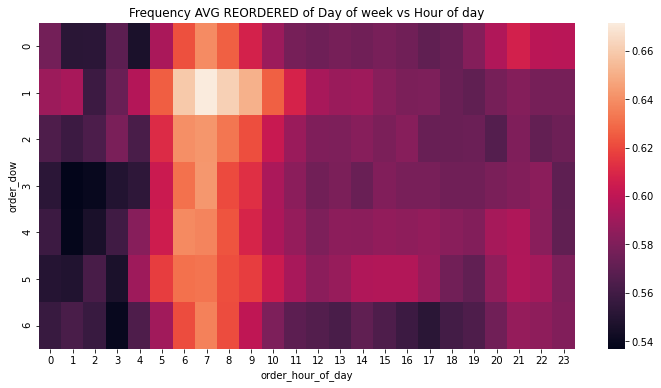

In [41]:
# merge customer past orders (order_prod_prior) & order in-depth details (orders)
orderprodprior_orders = pd.merge(order_prod_prior, orders, on='order_id', how='left')

# group data by order_dow, order_hour_of_day, and get average of reordered
grouped_df = orderprodprior_orders.groupby(['order_dow', 'order_hour_of_day'])['reordered'].aggregate('mean').reset_index()
grouped_df.head(3)
display(grouped_df)
grouped= grouped_df
# turn it to heatmap-suited format, by pivot it
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'reordered')
grouped_df.head(3)

# display result in heatmap 
plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Frequency AVG REORDERED of Day of week vs Hour of day")
plt.show()


# highest on Sunday between 6am to 9am (nice)
# in general, for any days, highest between 5am to 9am
# interpretation : 0.66 means, 66% of all orders are actually reorders (returning customers)

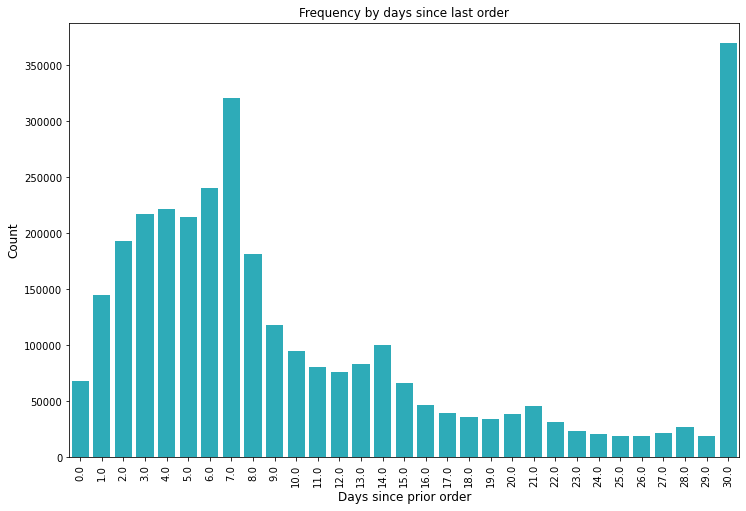

In [42]:
# Days since prior order column given
plt.figure(figsize=(12,8))
sns.countplot(x='days_since_prior_order', data=orders, color=color[9])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency by days since last order")
plt.show()

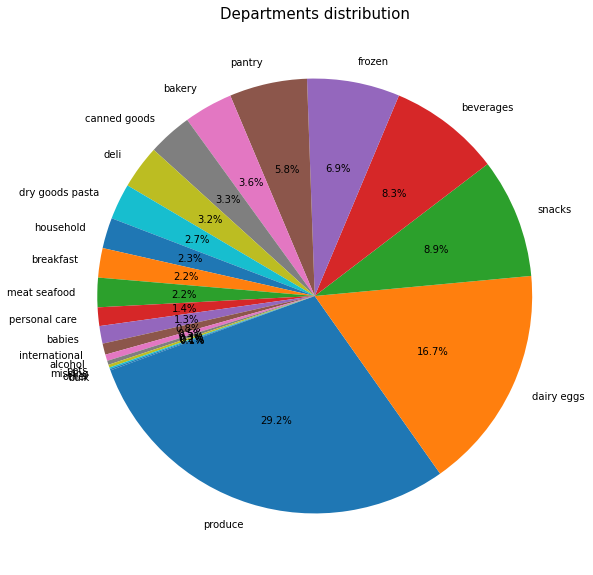

produce            0.292260
dairy eggs         0.166922
snacks             0.089027
beverages          0.082940
frozen             0.068952
pantry             0.057827
bakery             0.036282
canned goods       0.032930
deli               0.032411
dry goods pasta    0.026719
household          0.022774
breakfast          0.021877
meat seafood       0.021857
personal care      0.013785
babies             0.013066
international      0.008301
alcohol            0.004739
pets               0.003013
missing            0.002132
other              0.001119
bulk               0.001066
Name: department, dtype: float64

In [43]:
# department에 따른 비율
plt.figure(figsize=(10,10))
temp_series = all_join['department'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Departments distribution", fontsize=15)
plt.show()
temp_series['Percentage']= temp_series/sum(temp_series)
temp_series['Percentage']

## Analysis

### Manipulate Train, Test data

In [44]:
# 결과는 test 데이터의 75000개 
# 만든 data set: 480만개
display(orders[orders['eval_set']=='test'])
# train인 데이터들을 학습하여 test데이터 예측
# train 데이터 840만개 order_id로 group을 만들어 product_id 예측
orders[orders['eval_set']=='train']

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
38,2774568,3,test,13,5,15,11.0
44,329954,4,test,6,3,12,30.0
53,1528013,6,test,4,3,16,22.0
96,1376945,11,test,8,6,11,8.0
102,1356845,12,test,6,1,20,30.0
...,...,...,...,...,...,...,...
3420918,2728930,206202,test,23,2,17,6.0
3420929,350108,206204,test,5,4,14,14.0
3421001,1043943,206206,test,68,0,20,0.0
3421018,2821651,206207,test,17,2,13,14.0


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
10,1187899,1,train,11,4,8,14.0
25,1492625,2,train,15,1,11,30.0
49,2196797,5,train,5,0,11,6.0
74,525192,7,train,21,2,11,6.0
78,880375,8,train,4,1,14,10.0
...,...,...,...,...,...,...,...
3420838,2585586,206199,train,20,2,16,30.0
3420862,943915,206200,train,24,6,19,6.0
3420924,2371631,206203,train,6,4,19,30.0
3420933,1716008,206205,train,4,1,16,10.0


Train data의 reordered의 Nan 값을 0으로 치환했다. <br>
왜냐하면 우리가 구해야하는 것은 고객이 다음에 재주문을 할 것인지 아닌지지 그날 실제 구매를 했는지는 상관이 없기 때문이다. <br>
그러므로 Nan을 0으로 바꿔도 상관이 없다.

목적: 재주문 하느냐 1 <br>
기존 물품에서 앞으로 살건지를 예측: Nan을 이번엔 사지 않았다. 그런데 앞으로 살거냐에 대한 데이터가 x0 ~xn <br>
새로운 물품을 살지는 모른다. 샀던거를 다시 재주문을 할건지가 포인트. <br>
안샀지만 처음산 제품처럼 해도 상관이 없다. <br>

우리의 모델은 이 물건이 재주문이 될지 아닌지만 판단가능
마지막에 NAN값은 이 물건을 사지 않음
우리의 모델은 이 물건이 사졌을 때, 재주문된 물품인지 아닌지만 판단
우리는 이 물건이 사질지 말지는 몰라요
따라서 0으로 치환해도 


0의 의미는 유저가 처음으로 구매를 한 제품이다. <br>
1의 의미는 재주문을 했다는 뜻이다
<br>
Where the previous merge, left a NaN value on reordered column means that the customers they haven't bought the product. <br>
We change the value on them to 0.

In [ ]:
# check_reorder_nan = order_prod_train[['product_id','order_id', 'reordered']]
# print('order_prod_train')
# display(check_reorder_nan)
# print('order_id = 1854765')
# display(order_prod_train[(order_prod_train['order_id']==1854765)])
# display(check_reorder_nan[(check_reorder_nan['product_id']==196) & (check_reorder_nan['order_id']==1854765)]) # prior에는 있지만 train 에는 없다. order_id가
# print('orders_future')
# display(orders_future[orders_future['order_id']==1854765])
# display(data[(data['order_id']==1854765) & (data['product_id']==196)])

# print('data')

# # display(data)
# # 이유확인 아직 user가 재주문을 하지 않았다.
# train_data1 = data[data.eval_set == 'train']
# train_data1 = train_data1.merge(order_prod_train[['product_id','order_id', 'reordered']], on=['product_id','order_id'], how='left' )

# show = train_data1[(train_data1['order_id']==1854765)]
# display(show[['user_id', 'product_id','order_id', 'reordered', 'order_number']].set_index(['user_id']))
# train_data1.isnull().sum()

### With product name variables

In [45]:
# Get train data and test data
train_data = data[data.eval_set == 'train']
test_data = data[data.eval_set=='test']

# 여기서 order_prod_train데이터를 사용해서 reordered 데이터를 product_id, order_id로 merge
train_data = train_data.merge(order_prod_train[['product_id','order_id', 'reordered']], on=['product_id','order_id'], how='left' )

# reordered nan 값들은 0으로
# Where the previous merge, left a NaN value on reordered column means that the customers they haven't bought the product. We change the value on them to 0.
train_data.loc[:, 'reordered'] = train_data.reordered.fillna(0)

# 쓸모를 다한 eval_set과 order_id 제거
train_data = train_data.drop(['order_id', 'eval_set'], axis = 1)
test_data = test_data.drop(['order_id', 'eval_set'], axis = 1)

# user_id와 product_id로 groupby 진행후 sort
train_data = train_data.set_index(['user_id', 'product_id']).sort_index()
test_data = test_data.set_index(['user_id', 'product_id']).sort_index()
train_data

Times_Bought_N  total_orders  uxp_reorder_ratio  \
user_id product_id                                                    
1       196                     10            10           1.000000   
        10258                    9            10           1.000000   
        10326                    1            10           0.166667   
        12427                   10            10           1.000000   
        13032                    3            10           0.333333   
...                            ...           ...                ...   
206209  43961                    3            13           0.300000   
        44325                    1            13           0.142857   
        48370                    1            13           0.333333   
        48697                    1            13           0.142857   
        48742                    2            13           0.285714   

                    u_reordered  product_total_purchases  p_reorder_ratio  \
user_id product_id                                                          
1       196            0.694915                    35791         0.776480   
        10258          0.694915                     1946         0.713772   
        10326          0.694915                     5526         0.652009   
        12427          0.694915                     6476         0.740735   
        13032          0.694915                     3751         0.657158   
...                         ...                      ...              ...   
206209  43961          0.472868                    55371         0.630583   
        44325          0.472868                     3485         0.401148   
        48370          0.472868                     3934         0.699288   
        48697          0.472868                     9783         0.357661   
        48742          0.472868                     1723         0.498549   

                    order_size_avg  one_shot_pur  order_number  order_dow  \
user_id product_id                                                          
1       196               5.900000      0.417500            11          4   
        10258             5.900000      6.225000            11          4   
        10326             5.900000      4.017467            11          4   
        12427             5.900000      8.681319            11          4   
        13032             5.900000     10.790323            11          4   
...                            ...           ...           ...        ...   
206209  43961             9.923077     84.854701            14          6   
        44325             9.923077    741.000000            14          6   
        48370             9.923077     24.100000            14          6   
        48697             9.923077    185.840000            14          6   
        48742             9.923077     55.400000            14          6   

                    ...  product_reordered_dow  prod_reordered_hod  \
user_id product_id  ...                                              
1       196         ...               0.768907            0.800937   
        10258       ...               0.727612            0.719008   
        10326       ...               0.626277            0.675676   
        12427       ...               0.750890            0.808511   
        13032       ...               0.699262            0.675325   
...                 ...                    ...                 ...   
206209  43961       ...               0.630325            0.624653   
        44325       ...               0.383302            0.370107   
        48370       ...               0.677358            0.730159   
        48697       ...               0.340819            0.331677   
        48742       ...               0.500000            0.475806   

                    day_reorder_rate  hour_reorder_rate  hod_user_reordered  \
user_id product_id                                                            
1       196            

## Check Top features (corr>10%)

In [46]:
train_data.columns

Index(['Times_Bought_N', 'total_orders', 'uxp_reorder_ratio', 'u_reordered',
       'product_total_purchases', 'p_reorder_ratio', 'order_size_avg',
       'one_shot_pur', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'aisle_id', 'department_id', 'mean_position',
       'dept_reorder_rate', 'aisle_reorder_rate', 'avg_add_to_cart_pos',
       'dept_percentage', 'uxp_mean_position', 'dow_reordered',
       'dow_aisle_rordered', 'dow_dept_rordered', 'dow_hour_reorder',
       'product_reordered_dow', 'prod_reordered_hod', 'day_reorder_rate',
       'hour_reorder_rate', 'hod_user_reordered', 'dow_user_reordered',
       'hod_product_reordered', 'product_dow_reordered', 'isorganic',
       'reordered'],
      dtype='object')

Index(['Times_Bought_N', 'uxp_reorder_ratio', 'product_total_purchases',
       'p_reorder_ratio', 'mean_position', 'dept_reorder_rate',
       'aisle_reorder_rate', 'dow_aisle_rordered', 'dow_dept_rordered',
       'product_reordered_dow', 'prod_reordered_hod', 'reordered'],
      dtype='object')


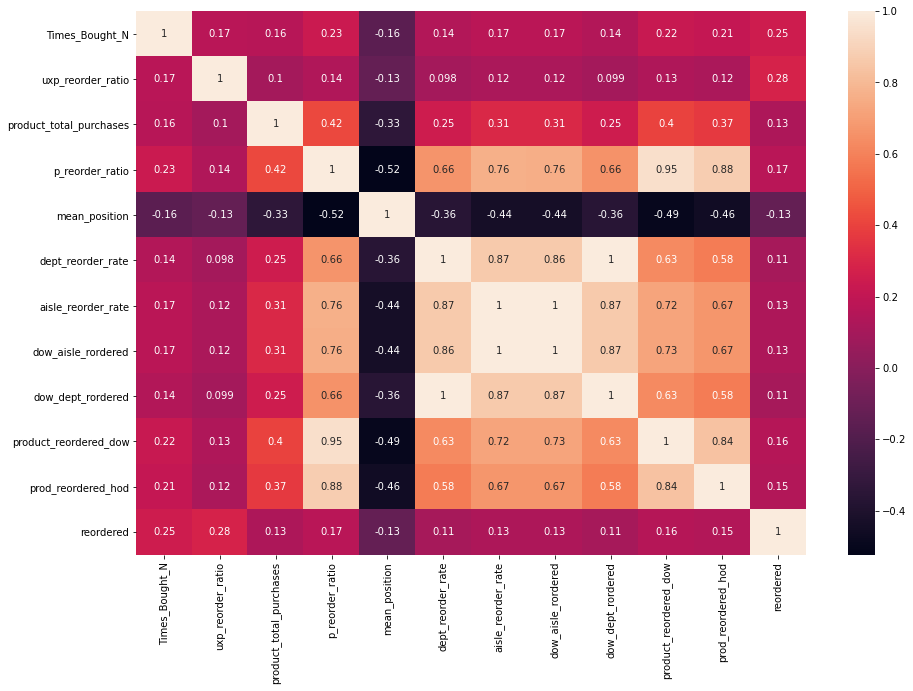

,Feature 1,Feature 2,Correlation Coefficient
36,reordered,reordered,1.000000
163,reordered,uxp_reorder_ratio,0.281597
173,reordered,Times_Bought_N,0.248379
235,reordered,p_reorder_ratio,0.167361
252,reordered,product_reordered_dow,0.159564
263,reordered,prod_reordered_hod,0.148533
298,reordered,aisle_reorder_rate,0.130655
301,reordered,dow_aisle_rordered,0.130308
305,reordered,mean_position,0.129359
313,reordered,product_total_purchases,0.126971


In [47]:
# 상관계수가 10% 이상인 종목만
cor = train_data.corr()
top_feature = cor.index[abs(cor['reordered']) >= 0.1]
print(top_feature)
top_corr = train_data[top_feature].corr()
plt.figure(figsize=(15,10))
sns.heatmap(top_corr, annot=True)
plt.xticks(rotation=90)
plt.show()

# corelation 확인
df_all_corr = train_data.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_all_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_all_corr[df_all_corr['Feature 1'] == 'reordered']

In [48]:
top_df = train_data[top_feature]
top_df

Times_Bought_N  uxp_reorder_ratio  \
user_id product_id                                      
1       196                     10           1.000000   
        10258                    9           1.000000   
        10326                    1           0.166667   
        12427                   10           1.000000   
        13032                    3           0.333333   
...                            ...                ...   
206209  43961                    3           0.300000   
        44325                    1           0.142857   
        48370                    1           0.333333   
        48697                    1           0.142857   
        48742                    2           0.285714   

                    product_total_purchases  p_reorder_ratio  mean_position  \
user_id product_id                                                            
1       196                           35791         0.776480       3.721774   
        10258                          1946         0.713772       4.277492   
        10326                          5526         0.652009       4.191097   
        12427                          6476         0.740735       4.760037   
        13032                          3751         0.657158       5.622767   
...                                     ...              ...            ...   
206209  43961                         55371         0.630583       9.194723   
        44325                          3485         0.401148      10.109900   
        48370                          3934         0.699288       8.344942   
        48697                          9783         0.357661       8.763058   
        48742                          1723         0.498549       7.991294   

                    dept_reorder_rate  aisle_reorder_rate  dow_aisle_rordered  \
user_id product_id                                                              
1       196                  0.653460            0.638832            0.632788   
        10258                0.574180            0.519170            0.523088   
        10326                0.649913            0.718104            0.720980   
        12427                0.574180            0.591986            0.583476   
        13032                0.560922            0.571584            0.569748   
...                               ...                 ...                 ...   
206209  43961                0.649913            0.638514            0.633045   
        44325                0.461076            0.453062            0.451338   
        48370                0.402178            0.528005            0.523536   
        48697                0.346721            0.350843            0.334800   
        48742                0.560922            0.499501            0.490805   

                    dow_dept_rordered  product_reordered_dow  \
user_id product_id                                             
1       196                  0.650271               0.768907   
        10258                0.565148               0.727612   
        10326                0.656404               0.626277   
        12427                0.565148               0.750890   
        13032                0.558289               0.699262   
...                               ...                    ...   
206209  43961                0.638100               0.630325   
        44325                0.458515               0.383302   
        48370                0.395386               0.677358   
        48697                0.329019               0.340819   
        48742                0.548609               0.500000   

                    prod_reordered_hod  reordered  
user_id product_id                                 
1       196                   0.800937        1.0  
        10258                 0.719008        1.0  
        10326                 0.675676        0.0  
        12427                 0.808511        0.0  
        13032                 0.675325        1.0  

## Experiment
### 1.  Using all features.
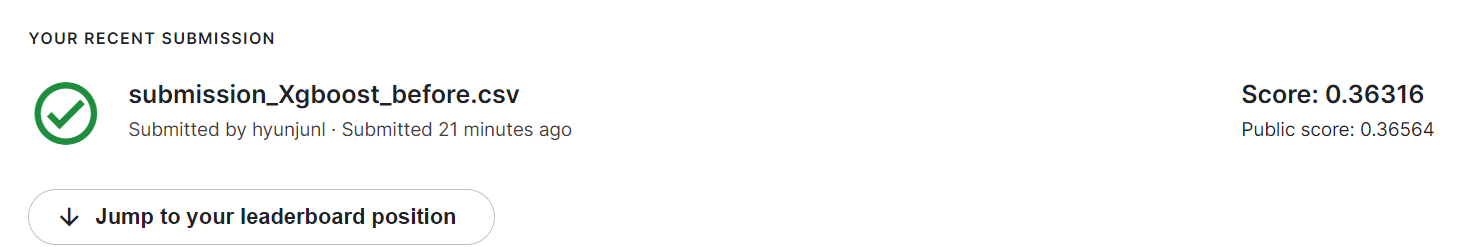


### 2. By deleting features that low xgboost importance features result got worse by 0.36 to 0.35.
feature selection xgboost 'uxp_reorder_ratio'는 corr, catboost에서 엄청 높게 나옴 그래서 삭제 x
- Delete
<br>
'total_orders', 'aisle_id', 'order_hour_of_day', 'dow_dept_reordered', 'uxp_mean_position', 'aisle_reoreder_rate', 'days_since_prior_order', <br>
'order_dow', 'dow_reordered', 'dept_percentage', 'department_id', 'dept_reoreder_rate' ,'Times_Bought_N', <br>
'isorganic', 'ischocolate', 'ischicken', 'iscoffee', 'isfruit', 'isyougurt', 'isrice', 'ismilk'

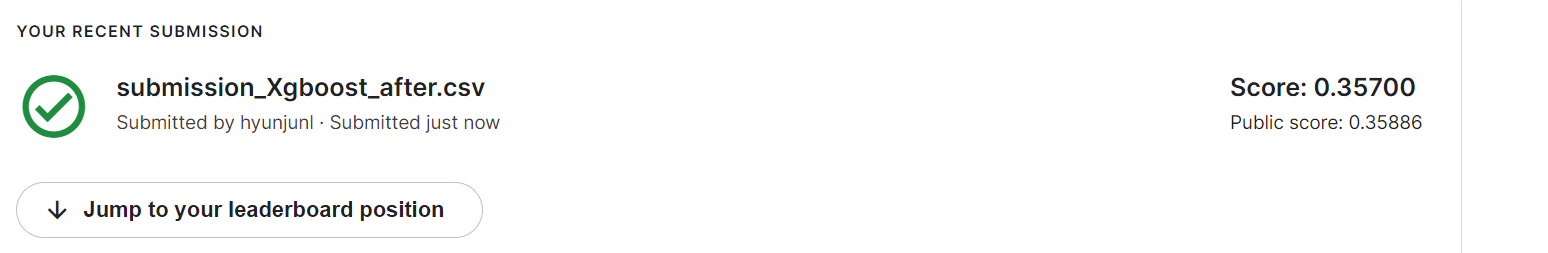

### 3. However when I deleted worst  8 features 'isorganic', 'ischocolate', 'ischicken', 'iscoffee', 'isfruit', 'isyougurt', 'isrice', 'ismilk' score improved.
- feature들중 정말 낮은 feature들 제거하니 점수 증가

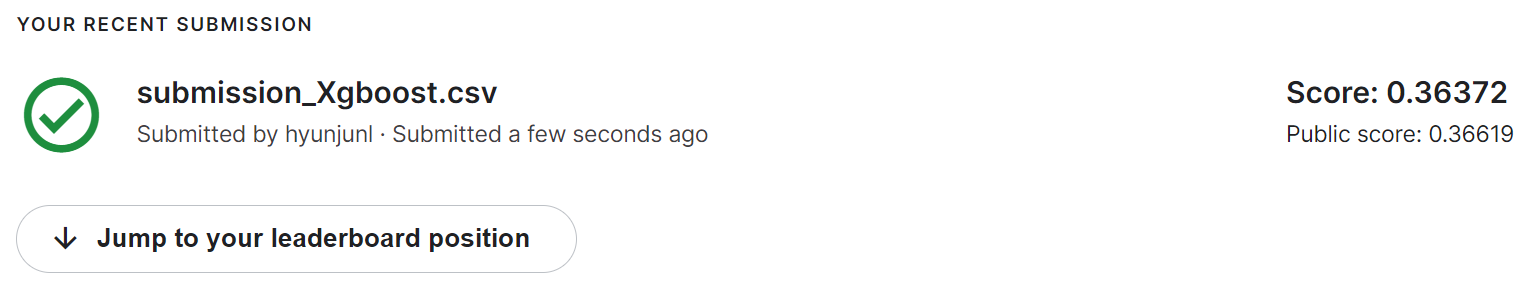
### 4. Using F1 score based optimization code score improved a lot


In [50]:
# data_1 = data.copy()
# data_1.columns
# data_1 = data_1.drop([ 'isorganic', 'ischocolate', 'ischicken', 'iscoffee', 'isfruit', 'isyogurt', 'isrice', 'ismilk'], axis = 1)  #'total_orders', 'aisle_id', 'order_hour_of_day', 'uxp_mean_position', 'days_since_prior_order', 'order_dow', 'dow_reordered', 'dept_percentage', 'department_id', 'dept_reorder_rate' ,'Times_Bought_N',
# train_data = data_1[data_1.eval_set == 'train']
# test_data = data_1[data_1.eval_set=='test']
# # train data에 y 변수인 reordered 추가
# train_data = train_data.merge(order_prod_train[['product_id','order_id', 'reordered']], on=['product_id','order_id'], how='left' )
# # 여기서 order_prod_train데이터를 사용해서 reordered 데이터를 product_id, order_id로 merge
# # train_data = train_data.merge(order_prod_train[['product_id','order_id', 'reordered', 'add_to_cart_order']], on=['product_id','order_id'], how='left' )
# train_data = train_data.fillna(0)
# # drop the unused order_id
# train_data = train_data.drop(['order_id', 'eval_set'], axis = 1)
# test_data = test_data.drop(['order_id', 'eval_set'], axis = 1)

# train_data = train_data.set_index(['user_id', 'product_id']).sort_index()
# test_data = test_data.set_index(['user_id', 'product_id']).sort_index()

# train_data

In [51]:
# F1 optimizer code
import numpy as np
from operator import itemgetter

class F1Optimizer():
    def __init__(self):
        pass

    @staticmethod
    def get_expectations(P, pNone=None):
        expectations = []
        P = np.sort(P)[::-1]

        n = np.array(P).shape[0]
        DP_C = np.zeros((n + 2, n + 1))
        if pNone is None:
            pNone = (1.0 - P).prod()

        DP_C[0][0] = 1.0
        for j in range(1, n):
            DP_C[0][j] = (1.0 - P[j - 1]) * DP_C[0, j - 1]

        for i in range(1, n + 1):
            DP_C[i, i] = DP_C[i - 1, i - 1] * P[i - 1]
            for j in range(i + 1, n + 1):
                DP_C[i, j] = P[j - 1] * DP_C[i - 1, j - 1] + (1.0 - P[j - 1]) * DP_C[i, j - 1]

        DP_S = np.zeros((2 * n + 1,))
        DP_SNone = np.zeros((2 * n + 1,))
        for i in range(1, 2 * n + 1):
            DP_S[i] = 1. / (1. * i)
            DP_SNone[i] = 1. / (1. * i + 1)
        for k in range(n + 1)[::-1]:
            f1 = 0
            f1None = 0
            for k1 in range(n + 1):
                f1 += 2 * k1 * DP_C[k1][k] * DP_S[k + k1]
                f1None += 2 * k1 * DP_C[k1][k] * DP_SNone[k + k1]
            for i in range(1, 2 * k - 1):
                DP_S[i] = (1 - P[k - 1]) * DP_S[i] + P[k - 1] * DP_S[i + 1]
                DP_SNone[i] = (1 - P[k - 1]) * DP_SNone[i] + P[k - 1] * DP_SNone[i + 1]
            expectations.append([f1None + 2 * pNone / (2 + k), f1])

        return np.array(expectations[::-1]).T

    @staticmethod
    def maximize_expectation(P, pNone=None):
        expectations = F1Optimizer.get_expectations(P, pNone)

        ix_max = np.unravel_index(expectations.argmax(), expectations.shape)
        max_f1 = expectations[ix_max]

        predNone = True if ix_max[0] == 0 else False
        best_k = ix_max[1]

        return best_k, predNone, max_f1

    @staticmethod
    def _F1(tp, fp, fn):
        return 2 * tp / (2 * tp + fp + fn)

    @staticmethod
    def _Fbeta(tp, fp, fn, beta=1.0):
        beta_squared = beta ** 2
        return (1.0 + beta_squared) * tp / ((1.0 + beta_squared) * tp + fp + beta_squared * fn)


def get_best_prediction(items, preds, pNone=None):
#    print("Maximize F1-Expectation")
#    print("=" * 23)
    items_preds = sorted(list(zip(items, preds)), key=itemgetter(1), reverse=True)
    P = [p for i,p in items_preds]
    L = [i for i,p in items_preds]
    
    opt = F1Optimizer.maximize_expectation(P)
    best_prediction = []
    best_prediction += (L[:opt[0]])
    if best_prediction == []:
        best_prediction = ['None']
            
#    print("Prediction {} yields best E[F1] of {}\n".format(best_prediction, f1_max))
    return ' '.join(list(map(str,best_prediction)))

## Divide Train & Validation dataset
- 80% for Training
- 20% for Validation

In [52]:
# TRAIN FULL 

###########################
## IMPORT REQUIRED PACKAGES
###########################
import xgboost
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

########################################
## SPLIT DF TO: X_train, y_train (axis=1)
########################################
X_train, X_val, y_train, y_val = train_test_split(train_data.drop('reordered', axis=1), train_data.reordered,
                                                    test_size=0.2, random_state=42)

In [60]:
# del temp_series, grouped_df, orderprodprior_orders, main_prod, product_dow_reordered, hod_product_reordered,
# dow_user_reordered, hod_user_reordered, day_reorder_rate, hour_reorder_rate, dow_reordered, dow_aisle_reordered, 
# dow_dept_reordered, dow_hour_reorder, prod_reordered_dow, prod_reordered_hod, dept_percentage, uxp_mean_position
# mean_position, aisle_reorder_rate, dept_reorder_rate, product_avg_peruser, one_shot_pur, order_size_avg, uxp_ratio, span,
# p_reorder, first_order_no, total_orders, times, products_purchased, user, orders_future, top_df
# gc.collect()

109

## Xgboost

In [62]:
import xgboost as xgb
from datetime import datetime
from sklearn.metrics import log_loss

def train_xgb(X_train, X_test, y_train, y_test, plot_importance = True, save = True, file_name = None, params = None):
    
    """
    Returns trained XGB model and output probabilities of validation set
    
    Parameters
    ----------
    X_train              : X_train data is passed 
    X_test               : X_test data is passed
    y_train              : y_train data is passed
    y_test               : y_test data is passed
    plot_importance      : The default is True
                          Boolean variable , Set to True if feature Importance
                          needs to be plotted
    save                 : The default is True
                          Boolean variable , Set to True if trained model 
                          needs to be saved
    file_name            : The default is None
                          Filename to be used while saving model
    params               : The default is None
                          dict of parameter set used to train XGBoost model
    Returns
    -------
    xgb_model            :  Trained XGBoost Model
    predict_y            : output probabilities for validation data
    """

    #defining set of parameters, these are optimal parameters obatined after 
    # rigorous hyperparameter Tuning
    if params is None:
        params = {}
        params['objective'] = 'binary:logistic'
        params['eval_metric'] = ['logloss']
        params['eta'] = 0.02
        params['max_depth'] = 15
        params['nthread']=-1
        params['colsample_bytree'] = 0.4
        params['tree_method'] = 'gpu_hist'
        
    #Create DataMatrix for XGBoost
    d_train = xgb.DMatrix(X_train, label=y_train)
    d_test = xgb.DMatrix(X_val, label=y_val)

    watchlist = [(d_train, 'train'), (d_test, 'valid')]
    
    #output Training Time
    start_time = datetime.now()
    print("Training Started :")
    xgb_model = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)
    print("Training Completed ")
    end_time = datetime.now()
    difference = end_time - start_time
    time = divmod(difference.total_seconds() , 360)
    print("Total Time : {} minutes {} seconds".format(time[0], time[1]))
    
    #get probabilities for validation set
    predict_y = xgb_model.predict(d_test)
    print("The test log loss is:", log_loss(y_val, predict_y, labels=[0,1], eps=1e-15))
    
    #save trained model
    try:
        if save:
            file_name = "xgb_v1.pkl"

            # save
            pickle.dump(bst, open(file_name, "wb"))
    except Exception:
        pass
    #plot Feature Importance
    if plot_importance:
        print("Feature Importance")
        fig, ax = plt.subplots(1,1,figsize=(10,10))
        xgb.plot_importance(booster = xgb_model, ax = ax)

    return xgb_model, predict_y

Training Started :
[0]	train-logloss:0.67981	valid-logloss:0.67991
[10]	train-logloss:0.56673	valid-logloss:0.56808
[20]	train-logloss:0.48613	valid-logloss:0.48894
[30]	train-logloss:0.42677	valid-logloss:0.43089
[40]	train-logloss:0.38270	valid-logloss:0.38820
[50]	train-logloss:0.34991	valid-logloss:0.35666
[60]	train-logloss:0.32393	valid-logloss:0.33211
[70]	train-logloss:0.30425	valid-logloss:0.31389
[80]	train-logloss:0.28882	valid-logloss:0.29994
[90]	train-logloss:0.27590	valid-logloss:0.28866
[100]	train-logloss:0.26564	valid-logloss:0.27991
[110]	train-logloss:0.25791	valid-logloss:0.27362
[120]	train-logloss:0.25123	valid-logloss:0.26850
[130]	train-logloss:0.24610	valid-logloss:0.26484
[140]	train-logloss:0.24128	valid-logloss:0.26157
[150]	train-logloss:0.23747	valid-logloss:0.25926
[160]	train-logloss:0.23438	valid-logloss:0.25759
[170]	train-logloss:0.23125	valid-logloss:0.25588
[180]	train-logloss:0.22891	valid-logloss:0.25491
[190]	train-logloss:0.22665	valid-logloss:

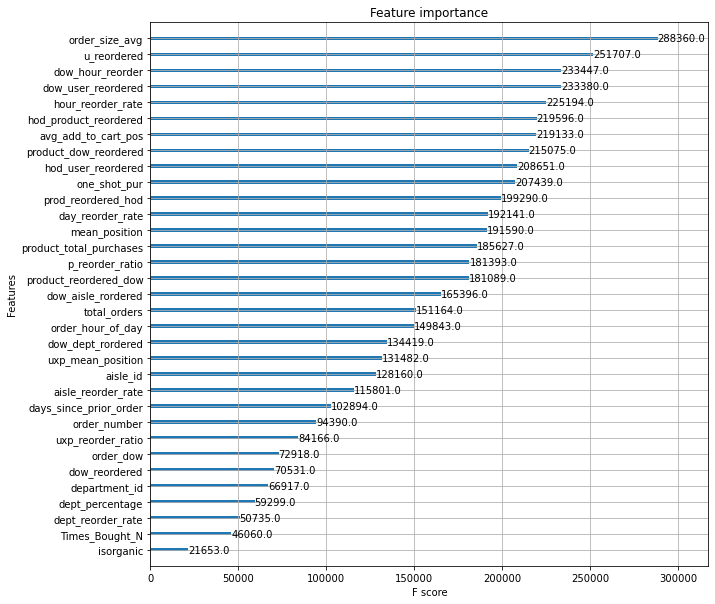

In [63]:
xgb_model = train_xgb(X_train, X_val, y_train, y_val)
# isorganic은 그나마 의미가 있음

## LogisticRegression

In [ ]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42, n_jobs = -1)
log_reg.fit(X_train, y_train)

predict_lgr = log_reg.predict_proba(X_val)
print("logloss on validation data :",log_loss(y_val, predict_lgr, labels=[0,1], eps=1e-15))
y_test_pred_lgr = (log_reg.predict(X_val)>0.1).astype(int)


In [ ]:
print('LogisticRegression model accuracy score: {0:0.4f}'. format(accuracy_score(y_val, y_test_pred_lgr)))
print('LogisticRegression model precision_score score: {0:0.4f}'. format(precision_score(y_val, y_test_pred_lgr)))
print('LogisticRegression model F1:',f1_score(y_val, y_test_pred_lgr))

## Catboost

In [64]:
from catboost import CatBoostClassifier

def train_catboost(X_train, X_test, y_train, y_test, plot_importance = True, save = True, file_name = None):
    
    """
    Returns trained catboost model and output probabilities of validation set
    
    Parameters
    ----------
    X_train              : X_train data is passed 
    X_test               : X_test data is passed
    y_train              : y_train data is passed
    y_test               : y_test data is passed
    plot_importance      : The default is True
                          Boolean variable , Set to True if feature Importance
                          needs to be plotted
    save                 : The default is True
                          Boolean variable , Set to True if trained model 
                          needs to be saved
    file_name            : The default is None
                          Filename to be used while saving model
    Returns
    -------
    xgb_model            :  Trained XGBoost Model
    predict_y            : output probabilities for validation data
    """


    start_time = datetime.now()
    print("Training Started :")

    #defining set of parameters, these are optimal parameters obatined after 
    # rigorous hyperparameter Tuning
    c_model = CatBoostClassifier(task_type = "GPU", verbose=False, depth = 13, iterations= 2000, learning_rate= 0.02, scale_pos_weight= 1.0)
    c_model.fit(X_train,y_train)
    print("Training Completed ")
    end_time = datetime.now()
    difference = end_time - start_time
    time = divmod(difference.total_seconds() , 3600)
#     print("Total Time : {} hours {} seconds".format(time[0], time[1]))
    
    #get output probabilities
    predict_y = c_model.predict_proba(X_test)
    print('prediction_y', predict_y)
    print("The Test log loss is:",log_loss(y_test, predict_y, labels=[0,1], eps=1e-15))
    
    #get probs for class 1
    predict_y = predict_y[:,-1]
    predict_y = (predict_y>0.1).astype(int)
    #save the model    
    try:
        if save:
            file_name = "cat_v1.pkl"

            # save
            pickle.dump(c_model, open(file_name, "wb"))
    except Exception:
        pass
    
    #plot feature importance
    if plot_importance:
        #ref: https://stackoverflow.com/a/65842279/11533069
        f_imp=pd.DataFrame({'features': X_train.columns.to_numpy(),'feature_importance': c_model.get_feature_importance()})
        f_imp.sort_values(by = 'feature_importance', ascending = False, inplace = True)

        print("Feature Importance")
        fig, ax = plt.subplots(1,1,figsize=(10,10))
        sns.barplot(x = f_imp['feature_importance'], y = f_imp['features'])
        plt.title('Feature Importance')
        plt.xlabel('Importance')
        plt.ylabel('Features')

    return c_model, predict_y

Training Started :


Training Completed 
prediction_y [[0.85070207 0.14929793]
 [0.98400919 0.01599081]
 [0.96984413 0.03015587]
 ...
 [0.90759133 0.09240867]
 [0.98762597 0.01237403]
 [0.97383252 0.02616748]]
The Test log loss is: 0.24887988932778993
Feature Importance


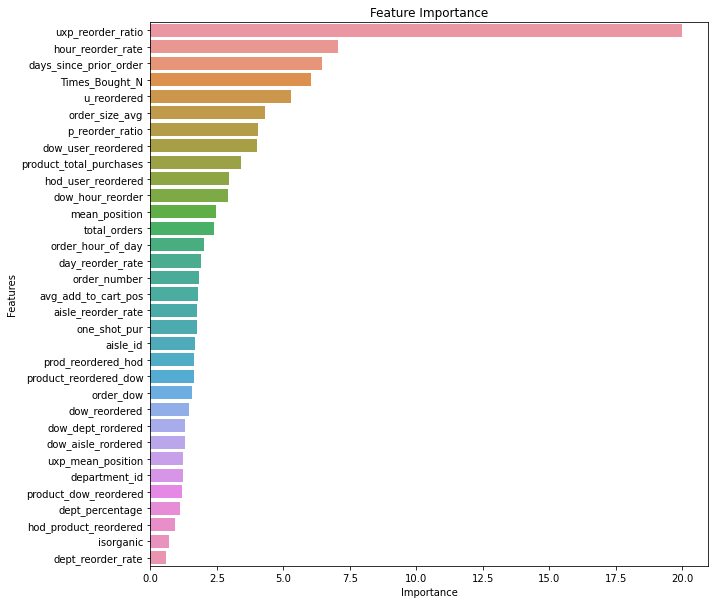

In [65]:
catboost_model = train_catboost(X_train, X_val, y_train, y_val)

## DecisionTreeClassifier

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RandomizedSearchCV

# param_grid = {}
# param_grid['max_depth'] = [5,10,15,20]
# param_grid['min_samples_split'] = [2,3,4,5]

# dt_clf = DecisionTreeClassifier()
# r_search = RandomizedSearchCV(dt_clf, param_distributions=param_grid, cv = 5, verbose = True, n_jobs = -1)
# r_search.fit(X_train, y_train)

# predict_y = r_search.predict_proba(X_val)
# print("logloss on validation data :",log_loss(y_val, predict_y, labels=[0,1], eps=1e-15))
# print('최적 하이퍼파라미터: ', r_search.best_params_)
# y_test_pred = r_search.predict(X_val)
# print('검증 정확도:', r_search.best_score_)
# print('F1:',f1_score(y_val, y_test_pred, pos_label = 1))

In [76]:
# TEST결과 생성 코드

# xgb_model
prediction_xgb = test_data.reset_index()
prediction_xgb = prediction_xgb[['product_id', 'user_id']]

d_test = xgb.DMatrix(test_data)
result = xgb_model[0].predict(d_test)
prediction_xgb["prediction"] = xgb_model[0].predict(d_test)

orders_val = orders[orders.eval_set=='test']
prediction_xgb = prediction_xgb.merge(orders_val[["user_id", "order_id"]], on='user_id', how='left')

prediction_xgb['product_id'] = prediction_xgb.product_id.astype(int)
prediction_xgb = prediction_xgb.drop('user_id', axis=1)
gc.collect()

143

In [77]:
import multiprocessing as mp
import time

# Xgboost model test result

prediction_xgb = test_data.reset_index()
prediction_xgb = prediction_xgb[['product_id', 'user_id']]

d_test = xgb.DMatrix(test_data)
result = xgb_model[0].predict(d_test)
prediction_xgb["prediction"] = xgb_model[0].predict(d_test)

orders_val = orders[orders.eval_set=='test']
prediction_xgb = prediction_xgb.merge(orders_val[["user_id", "order_id"]], on='user_id', how='left')

prediction_xgb['product_id'] = prediction_xgb.product_id.astype(int)
prediction_xgb = prediction_xgb.drop('user_id', axis=1)
gc.collect()
#==============================================================================
# load
#==============================================================================
sub_item_xgb = prediction_xgb.groupby(['order_id','product_id']).prediction.mean().reset_index()
sub_xgb = sub_item_xgb.groupby('order_id').product_id.apply(list).to_frame()
sub_xgb['yhat'] = sub_item_xgb.groupby('order_id').prediction.apply(list)
sub_xgb.reset_index(inplace=True)

gc.collect()

def multi(i):
    if i%1000==0:
        print('{:.3f} min'.format((time.time()-st_time)/60))
    items = sub_xgb.loc[i,'product_id']
    preds = sub_xgb.loc[i,'yhat']
    ret = get_best_prediction(items, preds)
    return ret

st_time = time.time()
pool = mp.Pool(4)
callback = pool.map(multi, range(sub.shape[0]))

sub_xgb['products'] = callback
sub_xgb.reset_index(inplace=True)
sub_xgb = sub_xgb[['order_id', 'products']]
display(sub_xgb)
# sub_xgb.to_csv('sub_xgb.csv', index=False)

0.029 min
0.206 min
0.377 min
0.508 min
0.587 min
0.702 min
0.860 min
1.003 min
1.058 min
1.206 min
1.403 min
1.567 min
1.632 min
1.725 min
1.941 min
2.069 min
2.217 min
2.240 min
2.480 min
2.554 min
2.686 min
2.772 min
2.992 min
3.082 min
3.247 min
3.284 min
3.535 min
3.561 min
3.760 min
3.844 min
4.044 min
4.060 min
4.267 min
4.352 min
4.553 min
4.613 min
4.744 min
4.863 min
5.043 min
5.060 min
5.253 min
5.355 min
5.523 min
5.568 min
5.766 min
5.907 min
6.031 min
6.102 min
6.310 min
6.397 min
6.599 min
6.675 min
6.870 min
6.902 min
7.073 min
7.261 min
7.359 min
7.406 min
7.565 min
7.661 min
7.921 min
7.983 min
8.048 min
8.190 min
8.443 min
8.487 min
8.562 min
8.693 min
8.968 min
8.984 min
9.081 min
9.303 min
9.505 min
9.537 min
9.849 min


,order_id,products
0,17,13107 21463 47766
1,34,39180 47029 16083 47766 21137 43504 39475 4463...
2,137,38689 24852 23794 41787 25890 43352 5134
3,182,13629 39275 9337 47209 27104 5479 47672 11520 ...
4,257,24852 49235 27104 27966 29837 39475 37646 2847...
...,...,...
74995,3420740,13176 35951 49005 19660 47209 39928 39146 3039...
74996,3420877,21137 13646 13176 49111 8277 12238 5161 42450 ...
74997,3420888,44632 35951 10880 2361 7963 22935
74998,3420989,42450 35004 47766 46676 13517 30169 43210 4722...


In [78]:
# TEST결과 생성 코드

# catboost_model test result

prediction_cat = test_data.reset_index()
prediction_cat = prediction_cat[['product_id', 'user_id']]


prediction_cat["prediction"] = catboost_model[0].predict(test_data)

orders_val = orders[orders.eval_set=='test']
prediction_cat = prediction_cat.merge(orders_val[["user_id", "order_id"]], on='user_id', how='left')

prediction_cat['product_id'] = prediction_cat.product_id.astype(int)
prediction_cat = prediction_cat.drop('user_id', axis=1)
gc.collect()
#==============================================================================
# load
#==============================================================================
sub_item_cat = prediction.groupby(['order_id','product_id']).prediction.mean().reset_index()
sub_cat = sub_item_cat.groupby('order_id').product_id.apply(list).to_frame()
sub_cat['yhat'] = sub_item_cat.groupby('order_id').prediction.apply(list)
sub_cat.reset_index(inplace=True)

gc.collect()

def multi(i):
    if i%1000==0:
        print('{:.3f} min'.format((time.time()-st_time)/60))
    items = sub_cat.loc[i,'product_id']
    preds = sub_cat.loc[i,'yhat']
    ret = get_best_prediction(items, preds)
    return ret

st_time = time.time()
pool = mp.Pool(4)
callback = pool.map(multi, range(sub.shape[0]))

sub_cat['products'] = callback
sub_cat.reset_index(inplace=True)
sub_cat = sub_cat[['order_id', 'products']]
display(sub_cat)
# sub.to_csv('sub_cat.csv', index=False)

0.027 min
0.203 min
0.374 min
0.507 min
0.583 min
0.697 min
0.858 min
0.999 min
1.057 min
1.203 min
1.402 min
1.563 min
1.633 min
1.722 min
1.948 min
2.059 min
2.221 min
2.242 min
2.488 min
2.556 min
2.688 min
2.756 min
3.002 min
3.083 min
3.248 min
3.273 min
3.537 min
3.567 min
3.762 min
3.839 min
4.043 min
4.064 min
4.272 min
4.350 min
4.553 min
4.615 min
4.749 min
4.860 min
5.042 min
5.063 min
5.261 min
5.357 min
5.523 min
5.576 min
5.775 min
5.909 min
6.030 min
6.111 min
6.320 min
6.405 min
6.600 min
6.689 min
6.880 min
6.910 min
7.073 min
7.281 min
7.370 min
7.417 min
7.567 min
7.673 min
7.947 min
7.996 min
8.049 min
8.204 min
8.459 min
8.514 min
8.559 min
8.707 min
8.986 min
9.015 min
9.081 min
9.321 min
9.539 min
9.556 min
9.868 min


,order_id,products
0,17,13107 21463 47766
1,34,39180 47029 16083 47766 21137 43504 39475 4463...
2,137,38689 24852 23794 41787 25890 43352 5134
3,182,13629 39275 9337 47209 27104 5479 47672 11520 ...
4,257,24852 49235 27104 27966 29837 39475 37646 2847...
...,...,...
74995,3420740,13176 35951 49005 19660 47209 39928 39146 3039...
74996,3420877,21137 13646 13176 49111 8277 12238 5161 42450 ...
74997,3420888,44632 35951 10880 2361 7963 22935
74998,3420989,42450 35004 47766 46676 13517 30169 43210 4722...


## Validation & Result

In [135]:
# TEST결과 생성 코드
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

def test_result(model_name, model, test_x, val_x, val_y):
    prediction = test_x.reset_index()
    prediction = prediction[['product_id', 'user_id']]
    
    result = 0.
    if model_name =='Xgboost':
        d_test = xgb.DMatrix(test_x)
        result = model.predict(d_test)
        prediction["reordered"] = (model.predict(d_test)> 0.2).astype(int)
    else:
        result = model.predict(test_x)
        prediction["reordered"] = (model.predict(test_x)> 0.2).astype(int)

    orders_val = orders[orders.eval_set=='test']
    prediction = prediction.merge(orders_val[["user_id", "order_id"]], on='user_id', how='left')

    prediction['product_id'] = prediction.product_id.astype(int)
    prediction = prediction.drop('user_id', axis=1)
    gc.collect()
    
    # validation
    if model_name =='Xgboost':
        d_val= xgb.DMatrix(val_x)
        val_prediction = (model.predict(d_val)> 0.2).astype(int)
    else:
        val_prediction = (model.predict(val_x)> 0.2).astype(int)

    print(model_name + ' model validation accuracy score: {0:0.4f}'. format(accuracy_score(val_y, val_prediction)))
    print(model_name + ' model validation recall score: {0:0.4f}'. format(recall_score(val_y, val_prediction)))
    print(model_name + ' model validation precision_score score: {0:0.4f}'. format(precision_score(val_y, val_prediction)))
    print(model_name + ' model validation f1 score: {0:0.4f}'. format(f1_score(val_y, val_prediction)))
    
    d_val = dict()
    for row in prediction.itertuples():
        if row.reordered == 1:
            try:
                d_val[row.order_id] += ' ' + str(row.product_id)
            except:
                d_val[row.order_id] = str(row.product_id)

    for order in prediction.order_id:
        if order not in d_val:
            d_val[order] = 'None'
    #Convert the dictionary into a DataFrame
    sub_val = pd.DataFrame.from_dict(d_val, orient='index')

    #Reset index
    sub_val.reset_index(inplace=True)
    #Set column names
    sub_val.columns = ['order_id', 'products']
    gc.collect()
    sub_val.to_csv('submission_'+ model_name +'.csv', index=False)
    return prediction["reordered"]

### Xgboost Result

In [136]:
# Xgboost result
# xgb_result = test_result('Xgboost', xgb_model[0], test_data, X_val, y_val)
# xgb_result

Xgboost model validation accuracy score: 0.8701
Xgboost model validation recall score: 0.5028
Xgboost model validation precision_score score: 0.3777
Xgboost model validation f1 score: 0.4313


0          0
1          0
2          0
3          0
4          0
          ..
4833220    0
4833221    0
4833222    0
4833223    0
4833224    0
Name: reordered, Length: 4833225, dtype: int64

### Logistic Regression

In [ ]:
# log_reg_result = test_result('Logistic Regression', log_reg, test_data, X_val, y_val)
# log_reg_result

### Catboost Result

In [139]:
# Catbost result
# catboost_result = test_result('catboost', catboost_model[0], test_data, X_val, y_val)
# catboost_result

catboost model validation accuracy score: 0.9089
catboost model validation recall score: 0.1607
catboost model validation precision_score score: 0.6401
catboost model validation f1 score: 0.2569


0          0
1          0
2          0
3          0
4          0
          ..
4833220    0
4833221    0
4833222    0
4833223    0
4833224    0
Name: reordered, Length: 4833225, dtype: int64

### Random Forest Result

In [ ]:
# # Random Forest result
# rf_result = test_result('random forest', r_search, test_data, X_val, y_val)
# rf_result

### Ensamble all the result
- When I tried the ensemble the result improved 
<br>
Score: 0.363 -> 0.36379
<br>
Public Score: 0.36455 -> 0.36571

In [ ]:
# prediction = test_data.reset_index()
# prediction = prediction[['product_id', 'user_id']]
# orders_val = orders[orders.eval_set=='test']
# prediction = prediction.merge(orders_val[["user_id", "order_id"]], on='user_id', how='left')

# prediction['product_id'] = prediction.product_id.astype(int)
# prediction = prediction.drop('user_id', axis=1)
# gc.collect()
# ensemble_result = (sub + catboost_result)/2 #rf_result + |
# print(ensemble_result.sum())
# prediction['reordered'] = (ensemble_result> 0.).astype(int)
# d_val = dict()
# for row in prediction.itertuples():
#     if row.reordered == 1:
#         try:
#             d_val[row.order_id] += ' ' + str(row.product_id)
#         except:
#             d_val[row.order_id] = str(row.product_id)

# for order in prediction.order_id:
#     if order not in d_val:
#         d_val[order] = 'None'
# #Convert the dictionary into a DataFrame
# sub_val = pd.DataFrame.from_dict(d_val, orient='index')

# #Reset index
# sub_val.reset_index(inplace=True)
# #Set column names
# sub_val.columns = ['order_id', 'products']
# gc.collect()
# sub_val.to_csv('submission_ensemble.csv', index=False)
# sub_val.head()

In [121]:
# F1 optimization ensemble
# 서로 없는 product 추가

xgb_list , cat_list = list(sub_xgb['products']), list(sub_cat['products'])
final_list = []
cnt = -1
for x, c in zip(xgb_list , cat_list):
    xs = x.split(' ')
    cs = c.split(' ')
    cnt+=1
    for i in xs:
        if i not in cs:
            cs.append(i)
    final_list.append(cs)
    final_list[cnt] = " ".join(final_list[cnt])

print(final_list[:10])
final_sub = sub_xgb[['order_id', 'products']]
fn = pd.DataFrame(final_list, columns = ['products'])
final_sub['products'] = fn



['13107 21463 47766', '39180 47029 16083 47766 21137 43504 39475 44632 44663 2596 48523', '38689 24852 23794 41787 25890 43352 5134', '13629 39275 9337 47209 27104 5479 47672 11520 35951 21903 30391 41149 33000 34243 15252', '24852 49235 27104 27966 29837 39475 37646 28476 30233 45013 47766 24838 13870 21137 22035 4605', '12779 45007 21903 46906 13198 30391 25890 28535', '35561 40688 33000 38768', '24852 39180 15872 47766 42265 45066 40759 21479 38281 25513 4920 8174 28985 22124 30450 21903 37935 35221 260 27156 17652', '20392 21709 21230 20564 31730 33320 27845 14947 9755 4472 21376 44632 7539', '40268 47766 30489 27086 35883 38694 12036 13702']


In [123]:
final_sub.to_csv('final_sub.csv', index = False)

In [124]:
sub_xgb.to_csv('sub_xgb.csv', index=False)

In [126]:
sub_cat.to_csv('submission_cat_F1optima.csv', index=False)